In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# shortcut
- Ctrl + / #comment

# Development Node
- loss function
- categorical feature
- other electricity data
- encoder and decoder + attention mechanism
- transformer

# 한글 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and di

# import library and electricity data

In [2]:
import pandas as pd
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np
%matplotlib inline  
plt.rc('font', family='NanumBarunGothic') 

import seaborn as sns
import random

#Low pass filter
from scipy import signal

#timestamp
import datetime
import time

#import libaray
import tensorflow as tf

In [ ]:
'''
import os 
import tqdm

#save the datafrmae
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/'):
  print(filenames)
  for filename in filenames[0:5]: 
    str=os.path.join(dirname, filename)
    df[i] = pd.DataFrame(pd.read_excel(str, header=2))
    df_data[i] = df[0:29].iloc[:,2:26]

'''


"\nimport os \nimport tqdm\n\n#save the datafrmae\nfor dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/'):\n  print(filenames)\n  for filename in filenames[0:5]: \n    str=os.path.join(dirname, filename)\n    df[i] = pd.DataFrame(pd.read_excel(str, header=2))\n    df_data[i] = df[0:29].iloc[:,2:26]\n\n"

In [ ]:
import os
import os.path
file_list = os.listdir("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/")

In [ ]:
#file_list[0:4]

In [ ]:
#type(file_list)

In [ ]:
file_list.sort()

In [ ]:
#file_list[0:4]

In [ ]:
#convert file_list into date_ist
date_list = []
for filename in file_list:  
  split = filename.split('-', 1) #split by '-'; one time  
  date = split[1].split('.')[0]
  date_list.append(date)

date_list.sort()
print("the number of date_list : ", len(date_list))
print(date_list)

#check whether we have all peak1, peak2, peak3 file per each day
count_dictionary = {i:date_list.count(i) for i in date_list}
print("count:")
print(count_dictionary )

filtered_dict = dict(filter(lambda elem:elem[1]==3, count_dictionary.items()))

date_list = list(filtered_dict.keys())
print("date_list: ", date_list)
print("num_date_list :", len(date_list))
del filtered_dict

the number of date_list :  1064
['2019-01-10', '2019-01-10', '2019-01-10', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-13', '2019-01-13', '2019-01-13', '2019-01-14', '2019-01-14', '2019-01-14', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-17', '2019-01-17', '2019-01-17', '2019-01-18', '2019-01-18', '2019-01-18', '2019-01-19', '2019-01-19', '2019-01-19', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-23', '2019-01-23', '2019-01-23', '2019-01-24', '2019-01-24', '2019-01-24', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-26', '2019-01-26', '2019-01-26', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-28', '2019-01-28', '2019-01-28', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-30', '2019-01-30', '2019-01-30', '2019-01-31', '2019-01-31', '2019-01-31', '2019-02-01', '2019-02-01', '2019-02-01', '

In [ ]:
# #store files in Pandas Series total_sum
# #index is timestamp and value is electricity amount
# #df = [] #list
# #data = pd.DataFrame([])
# total_sum = pd.Series([], name='electricity', dtype='float64')

# for date in date_list:                                            
#   #load data
#   ##load peak1
#   temp_data_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak01-"+date+'.xls', header=2)
#   temp_data_1 = temp_data_1[0:29].iloc[:,2:26]
#   sum_data_1 = temp_data_1.sum(axis=0)
#   ##load peak2
#   temp_data_2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak02-"+date+'.xls', header=2)
#   temp_data_2 = temp_data_2[0:26].iloc[:,2:26]
#   sum_data_2 = temp_data_2.sum(axis=0)
#   ##load peak3
#   temp_data_3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak03-"+date+'.xls', header=2)
#   temp_data_3 = temp_data_3[0:20].iloc[:,2:26]
#   sum_data_3 = temp_data_3.sum(axis=0)
#   ##sum
#   sum = pd.concat([sum_data_1, sum_data_2, sum_data_3], axis=1)
#   sum = sum.sum(axis=1)
#   #print(sum)
#   #print(sum.index)
    
#   #convert colnames into timestamp and get total energy consumption per hour
#   #print(date)
#   timestamp = [0] * len(sum.index) #initialization
#   for i in range(len(sum.index)):
#     timestamp[i] = time.mktime(datetime.strptime(date + ' ' + sum.index[i], '%Y-%m-%d %H:%M').timetuple())
#   sum.index = timestamp
#   #print("timestamp: ", timestamp)

#   #save on panda series (For tensorflow, it sholud be converted into np.array)
#   total_sum = pd.concat([total_sum, sum], axis=0)
  
# print(total_sum.shape)
# print(total_sum)

In [ ]:
#store files in Pandas Series total_sum
#index is timestamp and value is electricity amount
#df = [] #list
#data = pd.DataFrame([])
total_sum = pd.DataFrame([], dtype='float64')

for date in date_list :
  #print(date)                                            
  #load data
  ##load peak1
  temp_data_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak01-"+date+'.xls', header=2)
  temp_data_1 = temp_data_1[0:29].iloc[:,2:26]
  sum_data_1 = temp_data_1.sum(axis=0)
  ##load peak2
  temp_data_2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak02-"+date+'.xls', header=2)
  temp_data_2 = temp_data_2[0:26].iloc[:,2:26]
  sum_data_2 = temp_data_2.sum(axis=0)
  ##load peak3
  temp_data_3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load/"+"Peak03-"+date+'.xls', header=2)
  temp_data_3 = temp_data_3[0:20].iloc[:,2:26]
  sum_data_3 = temp_data_3.sum(axis=0)
  ##sum
  sum = pd.concat([sum_data_1, sum_data_2, sum_data_3], axis=1)
  sum = sum.sum(axis=1)
  #print(sum)
  #print(sum.index)
  time_data = list(sum.index)
    
  #convert colnames into timestamp and get total energy consumption per hour
  #print(date)
  timestamp = [0] * len(sum.index) #initialization
  for i in range(len(sum.index)):
    timestamp[i] = time.mktime(datetime.datetime.strptime(date + ' ' + sum.index[i], '%Y-%m-%d %H:%M').timetuple())
  sum.index = timestamp
  #print("timestamp: ", timestamp)

  #day information
  sum = pd.DataFrame(sum, columns=['electricity'])
  
  #print(date)
  year, month, day = date.split('-')
  sum['datetime'] = date
  sum['year'] = year
  sum['month'] = month
  sum['date'] = day
  sum['day'] = datetime.date(int(year),int(month),int(day)).weekday()
  sum['time'] = time_data
  #print(sum)

  #save on panda series (For tensorflow, it sholud be converted into np.array)
  total_sum = pd.concat([total_sum, sum], axis=0)


print(total_sum.shape)
print(total_sum)

(8136, 7)
              electricity    datetime  year month date  day   time
1.547078e+09  4972.561923  2019-01-10  2019    01   10    3  00:00
1.547082e+09  4775.692798  2019-01-10  2019    01   10    3  01:00
1.547086e+09  4692.373052  2019-01-10  2019    01   10    3  02:00
1.547089e+09  4585.957744  2019-01-10  2019    01   10    3  03:00
1.547093e+09  4547.673900  2019-01-10  2019    01   10    3  04:00
...                   ...         ...   ...   ...  ...  ...    ...
1.578683e+09  4794.614463  2020-01-10  2020    01   10    4  19:00
1.578686e+09  4794.614463  2020-01-10  2020    01   10    4  20:00
1.578690e+09  4794.614463  2020-01-10  2020    01   10    4  21:00
1.578694e+09  4794.614463  2020-01-10  2020    01   10    4  22:00
1.578697e+09  4632.572582  2020-01-10  2020    01   10    4  23:00

[8136 rows x 7 columns]


In [ ]:
timestamp = pd.Series(total_sum.index)
timestamp.index = total_sum.index
df_data = pd.concat([timestamp, total_sum], axis = 1, ignore_index=True)
df_data.columns = ['timestamp', 'electricity', 'datetime','year', 'month', 'date','day', 'time']
print(df_data)
del timestamp

                 timestamp  electricity    datetime  ... date day   time
1.547078e+09  1.547078e+09  4972.561923  2019-01-10  ...   10   3  00:00
1.547082e+09  1.547082e+09  4775.692798  2019-01-10  ...   10   3  01:00
1.547086e+09  1.547086e+09  4692.373052  2019-01-10  ...   10   3  02:00
1.547089e+09  1.547089e+09  4585.957744  2019-01-10  ...   10   3  03:00
1.547093e+09  1.547093e+09  4547.673900  2019-01-10  ...   10   3  04:00
...                    ...          ...         ...  ...  ...  ..    ...
1.578683e+09  1.578683e+09  4794.614463  2020-01-10  ...   10   4  19:00
1.578686e+09  1.578686e+09  4794.614463  2020-01-10  ...   10   4  20:00
1.578690e+09  1.578690e+09  4794.614463  2020-01-10  ...   10   4  21:00
1.578694e+09  1.578694e+09  4794.614463  2020-01-10  ...   10   4  22:00
1.578697e+09  1.578697e+09  4632.572582  2020-01-10  ...   10   4  23:00

[8136 rows x 8 columns]


In [ ]:
df_data.head(5)

,timestamp,electricity,datetime,year,month,date,day,time
1.547078e+09,1.547078e+09,4972.561923,2019-01-10,2019,01,10,3,00:00
1.547082e+09,1.547082e+09,4775.692798,2019-01-10,2019,01,10,3,01:00
1.547086e+09,1.547086e+09,4692.373052,2019-01-10,2019,01,10,3,02:00
1.547089e+09,1.547089e+09,4585.957744,2019-01-10,2019,01,10,3,03:00
1.547093e+09,1.547093e+09,4547.673900,2019-01-10,2019,01,10,3,04:00


## file save : raw electricity

In [ ]:
# #save the dataframe into drive
# df_data.to_csv('./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load_raw_data_electricity_20210812_allInfo.csv', sep=',', na_rep='Na')

In [ ]:
# #load the dataframe from drive
# df_data = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load_raw_data_electricity_20210812_allInfo.csv", index_col=0) 

## convert 'date' into one-hot vector

In [ ]:
type(df_data['date'])

pandas.core.series.Series

In [ ]:
category = df_data['date'].unique()
category.sort()
print(category)

[0 1 2 3 4 5 6]


In [ ]:
pd.Series([4,1,2,5,1,2,3,1]).unique()

array([4, 1, 2, 5, 3])

In [ ]:
[0] * 3

[0, 0, 0]

In [ ]:
def convert_oneHotVector(input_pd_series):
  '''
  input_list : pandas series 
    (ex) pd.Series([1, 2, 1, 0, 0])
  output : 2D numpy array 
    (ex) array([[0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0]])
  '''
  #initializaiton
  num_category = len(input_pd_series.unique())
  input_list = list(input_pd_series)
  output = np.array([[0] * num_category] * len(input_list))

  #one-hot vector
  for i in range(len(input_list)):
    value = input_list[i]
    output[i][value] = 1
  
  return output

In [ ]:
convert_oneHotVector(pd.Series([1, 2, 1, 0, 0]))

0 	 1
1
1 	 2
1
2 	 1
1
3 	 0
1
4 	 0
1


array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
convert_oneHotVector(df_data['date'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
#map(lambda x: convert_oneHotVector, df_data['date'])

In [ ]:
#list(map(lambda x: x ** 2, range(5)))

[0, 1, 4, 9, 16]

In [ ]:
df_data['date'] = convert_oneHotVector(df_data['date'])

In [ ]:
df_data['date']

1.547078e+09    0
1.547082e+09    0
1.547086e+09    0
1.547089e+09    0
1.547093e+09    0
               ..
1.578683e+09    0
1.578686e+09    0
1.578690e+09    0
1.578694e+09    0
1.578697e+09    0
Name: date, Length: 8136, dtype: int64

## Low Pass Filter on electricity

Low pass filter example

In [ ]:
#import library
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
rng = np.random.default_rng()
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + rng.standard_normal(len(t)) * 0.08

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


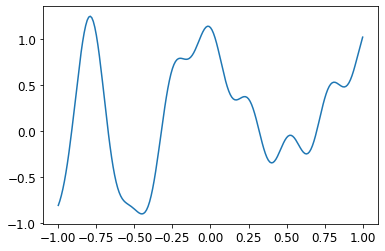

In [ ]:
plt.plot(t, x)

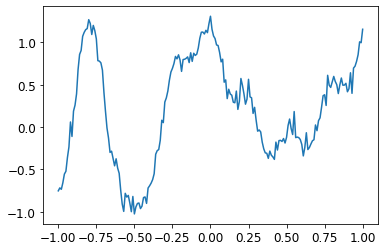

In [ ]:
plt.plot(t, xn)

In [ ]:
b, a = signal.butter(1, 0.05) #order of filter, the critical frequency

In [ ]:
#Apply the filter to xn. 
zi = signal.lfilter_zi(b, a) #Use lfilter_zi to choose the initial condition of the filte. Compute initial state (steady state of step response) for lfilter.
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

In [ ]:
#Apply the filter again, to have a result filtered at an order the same as filtfilt:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

In [ ]:
y = signal.filtfilt(b, a, xn)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


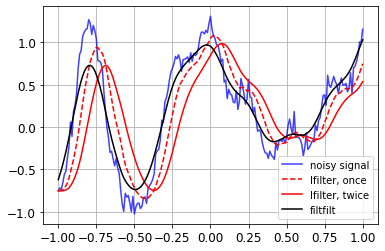

In [ ]:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75) #noisy signal
plt.plot(t, z, 'r--')  #lfilter, one
plt.plot(t, z2, 'r') #lfilter, twice
plt.plot(t, y, 'k') #lfilter
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [ ]:
b, a = signal.butter(3, 0.05)
y = signal.filtfilt(b, a, xn)
    #b : The numerator coefficient vector in a 1-D sequence.
    #a : The denominator coefficient vector in a 1-D sequence. If a[0] is not 1, then both a and b are normalized by a[0].

Apply the low pass filter in our data

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


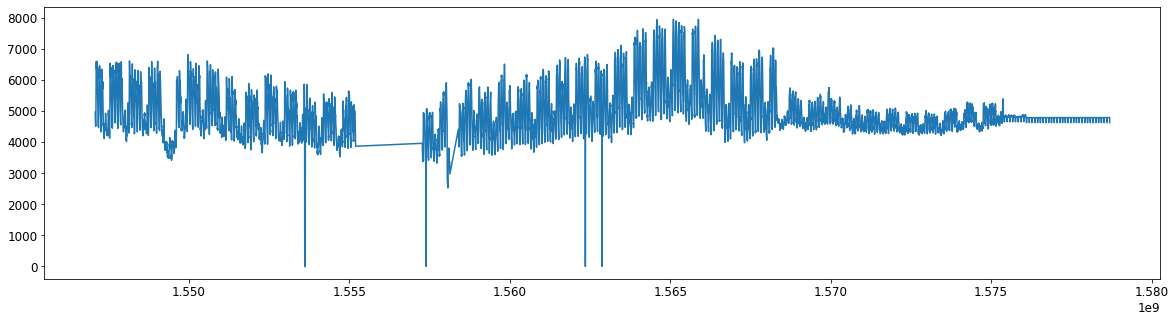

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

xn = df_data['electricity']
t = df_data['timestamp']
plt.plot(t, xn)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


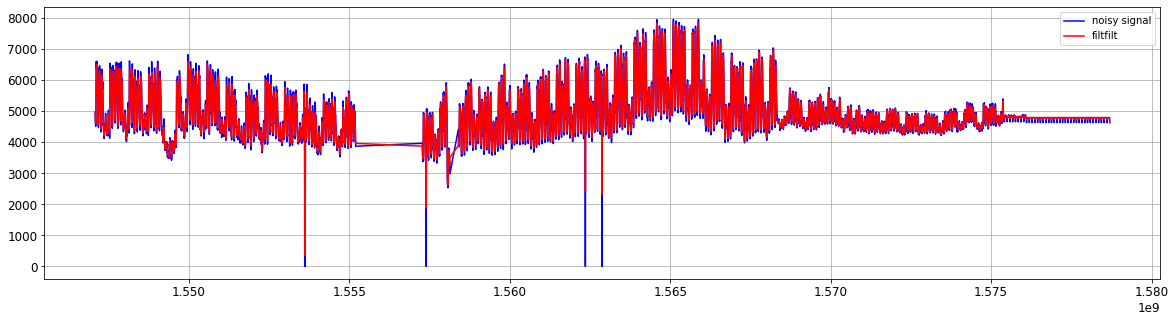

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#filter variable
b, a = signal.butter(1, 0.3)

y = signal.filtfilt(b, a, xn)

plt.figure
plt.subplot(1,1,1)
plt.plot(t, xn, 'b')
plt.plot(t, y, 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()


In [ ]:
#assign the filter result into dataframe
df_data['electricity'] = y

## rolling mean

In [ ]:
#df_data.columns = [i for i in range(24)]

In [ ]:
# ma = 2
# df_data.rolling(ma).mean()

In [ ]:
# plt.figure(figsize=(40,20))
# df_data.T.rolling(ma).mean().plot()

In [ ]:
# #initialization
# average=pd.DataFrame([])

# #for loop
# for ma in ma_time:
#     for time in df_data.columns:
#         average[ma] = df_data.rolling(ma).mean()

# Weather information

In [ ]:
weather = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/weather/OBS_ASOS_TIM_20210711215129.csv", header=0, encoding='CP949'))

In [ ]:
weather.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,156,광주,2019-01-10 00:00,0.2,0.0,NaN,NaN,0.2,NaN,0,NaN,39,0.0,2.4,-12.1,1019.4,0.0,1028.6,0.0,NaN,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,1981,NaN,NaN,-1.5,0.0,NaN,NaN,NaN,NaN
1,156,광주,2019-01-10 01:00,-0.2,0.0,NaN,NaN,0.6,NaN,270,NaN,39,0.0,2.3,-12.5,1019.1,0.0,1028.3,0.0,NaN,9.0,NaN,NaN,NaN,10.0,10.0,NaN,34.0,1995,NaN,NaN,-1.4,0.0,NaN,NaN,NaN,NaN
2,156,광주,2019-01-10 02:00,-0.5,0.0,NaN,NaN,0.1,NaN,0,NaN,42,0.0,2.5,-11.8,1019.2,0.0,1028.4,0.0,NaN,9.0,NaN,NaN,NaN,9.0,9.0,NaN,28.0,1987,NaN,NaN,-1.4,0.0,NaN,NaN,NaN,NaN
3,156,광주,2019-01-10 03:00,-0.3,0.0,NaN,NaN,0.0,NaN,0,NaN,42,0.0,2.5,-11.6,1019.0,0.0,1028.2,0.0,NaN,9.0,NaN,NaN,NaN,10.0,10.0,As,28.0,1983,NaN,NaN,-1.3,0.0,NaN,NaN,NaN,NaN
4,156,광주,2019-01-10 04:00,0.0,0.0,NaN,NaN,0.0,NaN,0,NaN,35,0.0,2.1,-13.6,1018.6,0.0,1027.8,0.0,NaN,9.0,NaN,NaN,NaN,10.0,10.0,As,26.0,2000,NaN,NaN,-1.3,0.0,NaN,NaN,NaN,NaN


In [ ]:
#weather.isnull().any()

In [ ]:
weather_df = weather.iloc[:,[2,3,5,7,9,11,13,14,15,17,24,28,31]]

In [ ]:
weather_df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,2019-01-10 00:00,0.2,NaN,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,2019-01-10 01:00,-0.2,NaN,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,2019-01-10 02:00,-0.5,NaN,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4
3,2019-01-10 03:00,-0.3,NaN,0.0,0,42,2.5,-11.6,1019.0,1028.2,10.0,1983,-1.3
4,2019-01-10 04:00,0.0,NaN,0.0,0,35,2.1,-13.6,1018.6,1027.8,10.0,2000,-1.3


In [ ]:
weather_df.columns

Index(['일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '전운량(10분위)', '시정(10m)',
       '지면온도(°C)'],
      dtype='object')

## Data preprocessing

### timestamp

In [ ]:
#convert time into timestamp
weather_df.rename(columns={"일시":"timestamp"}, inplace=True)
length = len(weather_df['timestamp']) #variable
timestamp = [0] * length #initialization
for i in range(length):
  timestamp[i] = time.mktime(datetime.datetime.strptime(weather_df['timestamp'][i], '%Y-%m-%d %H:%M').timetuple())
weather_df['timestamp'] = timestamp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### 강수량

In [ ]:
#replace NaN with 0 in 강수량
temp = weather_df.iloc[:,2].fillna(0).copy() #different memory space
weather_df.iloc[:,2] = temp
del temp
print(weather_df.head())

      timestamp  기온(°C)  강수량(mm)  ...  전운량(10분위)  시정(10m)  지면온도(°C)
0  1.547078e+09     0.2      0.0  ...        9.0     1981      -1.5
1  1.547082e+09    -0.2      0.0  ...       10.0     1995      -1.4
2  1.547086e+09    -0.5      0.0  ...        9.0     1987      -1.4
3  1.547089e+09    -0.3      0.0  ...       10.0     1983      -1.3
4  1.547093e+09     0.0      0.0  ...       10.0     2000      -1.3

[5 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### 전운량

In [ ]:
#weather_df[weather_df.isnull().any(axis=1)]['전운량(10분위)']

In [ ]:
#replace NaN with 0 in 전운량
for i in weather_df[weather_df.isnull().any(axis=1)]['전운량(10분위)'].index:
  print(i)

  if (weather_df['전운량(10분위)'][i-1] == weather_df['전운량(10분위)'][i-1] and weather_df['전운량(10분위)'][i+1] == weather_df['전운량(10분위)'][i+1] ):  #Both previous and next value is not null
        weather_df['전운량(10분위)'][i] = (weather_df['전운량(10분위)'][i-1] + weather_df['전운량(10분위)'][i+1])/2
  elif (weather_df['전운량(10분위)'][i-1] == weather_df['전운량(10분위)'][i-1]) :  #Only previous value is not null
        weather_df['전운량(10분위)'][i] = weather_df['전운량(10분위)'][i-1]
  elif (weather_df['전운량(10분위)'][i+1] == weather_df['전운량(10분위)'][i+1]) : #Only next value is not null
        weather_df['전운량(10분위)'][i] = weather_df['전운량(10분위)'][i+1]
  else :
        print('think')                                 



985
1027
1028
1030
2182
3241
3308
3310
3311
3313
3314
3509
3673
3932
8348
8515


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
weather_df.isnull().any()

timestamp    False
기온(°C)       False
강수량(mm)      False
풍속(m/s)      False
풍향(16방위)     False
습도(%)        False
증기압(hPa)     False
이슬점온도(°C)    False
현지기압(hPa)    False
해면기압(hPa)    False
전운량(10분위)    False
시정(10m)      False
지면온도(°C)     False
dtype: bool

In [ ]:
weather_df.head()

,timestamp,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,0.2,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,-0.2,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,-0.5,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4
3,1.547089e+09,-0.3,0.0,0.0,0,42,2.5,-11.6,1019.0,1028.2,10.0,1983,-1.3
4,1.547093e+09,0.0,0.0,0.0,0,35,2.1,-13.6,1018.6,1027.8,10.0,2000,-1.3


### temperature

In [ ]:
weather_df.columns

Index(['timestamp', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '전운량(10분위)',
       '시정(10m)', '지면온도(°C)'],
      dtype='object')

In [ ]:
weather_df.rename(columns={"기온(°C)":"temperature"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
weather_df.head()

,timestamp,temperature,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,0.2,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,-0.2,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,-0.5,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4
3,1.547089e+09,-0.3,0.0,0.0,0,42,2.5,-11.6,1019.0,1028.2,10.0,1983,-1.3
4,1.547093e+09,0.0,0.0,0.0,0,35,2.1,-13.6,1018.6,1027.8,10.0,2000,-1.3


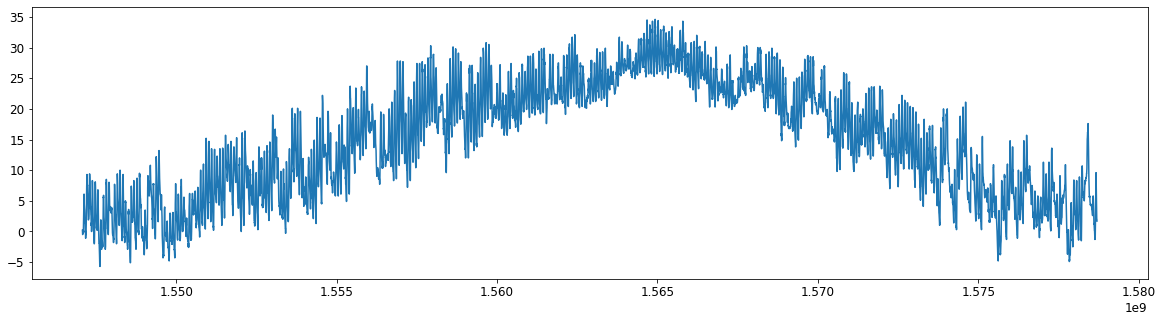

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

xn = weather_df['temperature']
t = weather_df['timestamp']
plt.plot(t, xn)

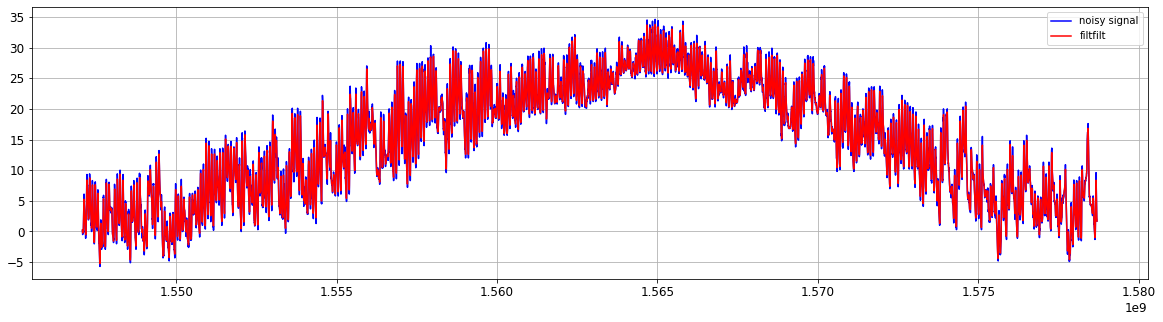

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#filter variable
b, a = signal.butter(1, 0.3)
y = signal.filtfilt(b, a, xn)

plt.figure
plt.subplot(1,1,1)
plt.plot(t, xn, 'b')
plt.plot(t, y, 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()

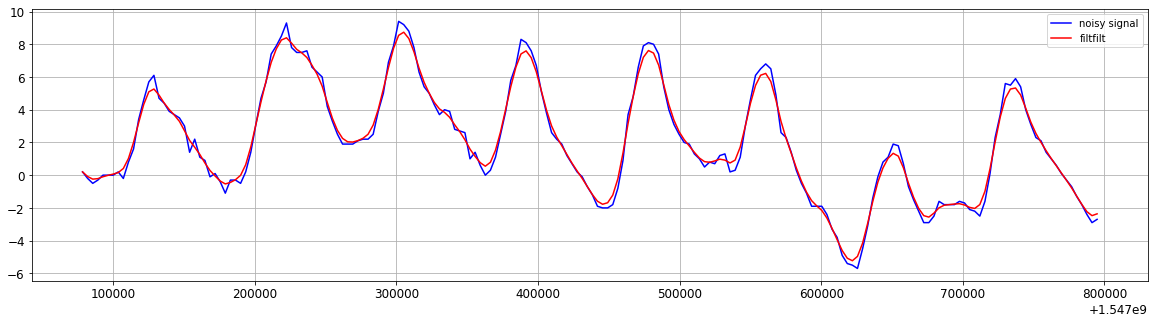

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

xn_copy = xn[0:200]
t_copy = t[0:200]
y_copy = y[0:200]

plt.figure
plt.subplot(1,1,1)
plt.plot(t_copy, xn_copy, 'b')
plt.plot(t_copy, y_copy, 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()

del xn_copy, t_copy, y_copy

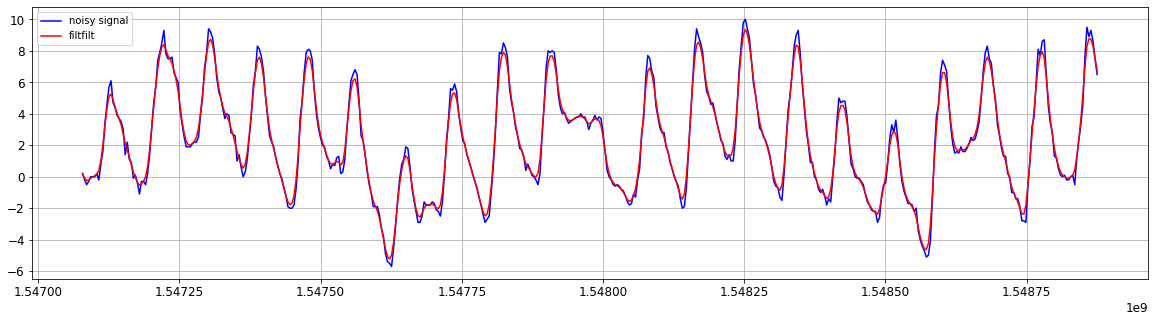

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

xn_copy = xn[0:500]
t_copy = t[0:500]
y_copy = y[0:500]

plt.figure
plt.subplot(1,1,1)
plt.plot(t_copy, xn_copy, 'b')
plt.plot(t_copy, y_copy, 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()

del xn_copy, t_copy, y_copy

In [ ]:
print(weather_df.shape)
print(len(t))

(8784, 13)
8784


In [ ]:
weather_df['temperature'][:20]

0     0.2
1    -0.2
2    -0.5
3    -0.3
4     0.0
5     0.0
6     0.0
7     0.2
8    -0.2
9     0.8
10    1.6
11    3.4
12    4.6
13    5.7
14    6.1
15    4.7
16    4.4
17    3.9
18    3.7
19    3.5
Name: temperature, dtype: float64

In [ ]:
weather_df['temperature'] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
weather_df['temperature'][:20]

0     0.200089
1    -0.084427
2    -0.241907
3    -0.212708
4    -0.096140
5    -0.009222
6     0.064761
7     0.159447
8     0.407645
9     1.017217
10    2.001588
11    3.198577
12    4.323439
13    5.095460
14    5.265006
15    4.894559
16    4.411285
17    4.013968
18    3.671309
19    3.288407
Name: temperature, dtype: float64

### save file : weather (processed)

In [ ]:
# #save the dataframe into drive
# weather_df.to_csv('./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load_processed_weather_20210811.csv', sep=',', na_rep='Na')

In [ ]:
# #load the dataframe from drive
# weather_df = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load_processed_weather_20210811.csv", index_col=0) 

## merge

In [ ]:
df_data.head(3)

,timestamp,electricity,datetime,year,month,date,day,time
1.547078e+09,1.547078e+09,4972.864469,2019-01-10,2019,1,10,3,00:00
1.547082e+09,1.547082e+09,4827.328137,2019-01-10,2019,1,10,3,01:00
1.547086e+09,1.547086e+09,4714.399517,2019-01-10,2019,1,10,3,02:00


In [ ]:
weather_df.head(3)

,timestamp,temperature,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,0.200089,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,-0.084427,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,-0.241907,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4


In [ ]:
#merge with df_data
if('temperature' not in df_data.columns):
  df_data = pd.merge(df_data, weather_df, how='inner', on='timestamp')

In [ ]:
df_data.head(3)

,timestamp,electricity,datetime,year,month,date,day,time,temperature,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,4972.864469,2019-01-10,2019,1,10,3,00:00,0.200089,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,4827.328137,2019-01-10,2019,1,10,3,01:00,-0.084427,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,4714.399517,2019-01-10,2019,1,10,3,02:00,-0.241907,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4


# Korea electricity statistics

In [ ]:
ls "/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/한전_데이터/"

'한국전력거래소_시간별 발전량(2017~2020년)_20201231.csv'
'한국전력거래소_시간별 광주 태양광 발전량_20200930.csv'
'한국전력거래소_시간별 전력수요량(2021년)_20210331.csv'


In [ ]:
import os
import os.path
file_list = os.listdir("/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/한전_데이터/")

In [ ]:
korea_electricity_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/한전_데이터/한국전력거래소_시간별 발전량(2017~2020년)_20201231.csv', encoding='euc-kr')

In [ ]:
korea_electricity_1.head()

,거래일,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2017-01-01,55122.00025,52867.08431,51112.85964,50228.43714,50270.22378,50799.94295,50977.49163,50159.77005,49592.16798,49722.51782,49953.99787,49637.58557,49429.43912,49185.34085,49326.41341,49371.40992,49589.38287,51882.15402,53668.27648,53537.42430,53490.78492,53574.56477,54804.75240,55415.26297
1,2017-01-02,53229.02548,52920.74405,52521.67207,52558.05400,53271.30338,54905.05820,56645.02366,58570.71254,64429.09414,67943.25673,68466.82279,67668.76694,63281.21054,65109.58370,65638.65262,65560.15769,66293.47450,66666.54602,65854.39132,64004.04846,62153.75753,60619.74204,60606.06141,61807.70918
2,2017-01-03,58347.54895,57012.44028,56541.88017,56513.31631,57373.69797,58908.70117,61596.09922,64252.66753,68662.06271,71201.37381,70521.89269,69079.54475,63811.02411,66080.48151,66752.04802,66488.28873,67703.83451,68683.59288,68571.18682,66663.57764,64526.28462,62889.17741,62559.95542,63718.92409
3,2017-01-04,60016.32336,58366.48843,58643.34614,58715.11106,58916.98777,59710.07343,61895.51298,64259.83376,69180.34447,71630.16282,71161.95837,69726.91675,64560.57812,66751.44529,67257.05729,66809.35692,67653.22112,68143.51424,67470.51174,65571.37045,63998.52134,62667.07412,62512.13690,63744.05670
4,2017-01-05,59751.77799,57865.01145,58001.78231,57893.72453,58456.74216,59722.97433,62058.10242,64262.80299,69080.14776,71715.61673,71807.73837,70984.73091,66580.80825,69163.48994,69860.23713,69280.43397,69700.31720,69391.24809,68039.52590,65975.46819,63804.64394,62122.48427,61813.14500,63178.04751


In [ ]:
korea_electricity_1.shape[0]

1461

In [ ]:
korea_electricity_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/한전_데이터/한국전력거래소_시간별 전력수요량(2021년)_20210331.csv', encoding='euc-kr')

In [ ]:
korea_electricity_2.head()

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2021-01-01,64942,62593,60905,59889,59638,59936,60193,59982,59626,57904,57604,56869,56191,56424,56691,58299,60425,62931,64176,63645,62754,61561,61979,63055
1,2021-01-02,60658,58603,57309,56663,56733,57327,58378,59285,60669,59515,58770,57296,55466,55066,55493,57865,61407,64223,65082,64257,62981,61686,61962,64227
2,2021-01-03,61992,59723,58310,57599,57518,58073,58877,59373,59434,56835,56485,55912,56037,57802,59465,61355,63202,65426,66473,65646,64815,63289,63706,64480
3,2021-01-04,62078,60011,58936,58715,59233,61081,64908,71659,80766,82796,82045,79963,76537,79560,81315,81431,82840,81666,78838,75717,72867,69726,68460,70327
4,2021-01-05,67267,64957,63471,63136,63564,65045,68221,73685,81609,83240,82328,80551,78105,80560,81612,82647,84497,83721,81513,78460,75423,72053,70992,72838


In [ ]:
korea_electricity_1.shape[0]

1461

In [ ]:
#input
input_dataframe = korea_electricity_2

#for loop
korea_electricity_df = pd.DataFrame([])
for i in range(input_dataframe.shape[0]): #row in dataframe (0~30day)
  partial_df = pd.DataFrame([])
  temp = [] #[[0] * 2] *24
  for j in range(1,25): #time in a row (0h ~ 24h)
    #get the timestamp and electricity value from dataframe
    date = input_dataframe.iloc[i, 0]
    if (j-1 < 10):
      date = date + " 0" + str(j-1)
    else:
      date = date + " " + str(j-1)
    timestamp = time.mktime(datetime.datetime.strptime(date, '%Y-%m-%d %H').timetuple())
      #datetime does not allow 24:00. It is out of range in this library.
    electricity = input_dataframe.iloc[i, j]

    #save the [timestamp, electricity] in temp
    temp.append([timestamp, electricity])
  #merge all temp into one dataframe
  korea_electricity_df = pd.concat([korea_electricity_df, pd.DataFrame(temp)], axis=0)
korea_electricity_df.columns = ['timestamp', 'korea_electricity']
print(korea_electricity_df.shape)
print(korea_electricity_df.shape[0] == input_dataframe.shape[0] * 24)
print(korea_electricity_df)

(2160, 2)
       timestamp  korea_electricity
0   1.609459e+09              64942
1   1.609463e+09              62593
2   1.609466e+09              60905
3   1.609470e+09              59889
4   1.609474e+09              59638
..           ...                ...
19  1.617217e+09              65755
20  1.617221e+09              64479
21  1.617224e+09              63083
22  1.617228e+09              61378
23  1.617232e+09              61091

[2160 rows x 2 columns]


In [ ]:
temp_1= korea_electricity_df

In [ ]:
temp_1.shape

(35064, 2)

In [ ]:
korea_electricity_df = pd.concat([temp_1, korea_electricity_df], axis=0)
del temp_1

In [ ]:
korea_electricit.shape

(37224, 2)

save the data

In [ ]:
# #save the dataframe into drive
# korea_electricity_df.to_csv('./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/korea_eletricity_consumption_20210813.csv', sep=',', na_rep='Na')

In [ ]:
# #load the dataframe from drive
# korea_electricity_df = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/한전_데이터/korea_eletricity_consumption_20210813.csv", index_col=0) 

## low pass filter on korea electricity

In [ ]:
korea_electricity_df.head(3)

,timestamp,korea_electricity
0,1.483229e+09,55122.00025
1,1.483232e+09,52867.08431
2,1.483236e+09,51112.85964


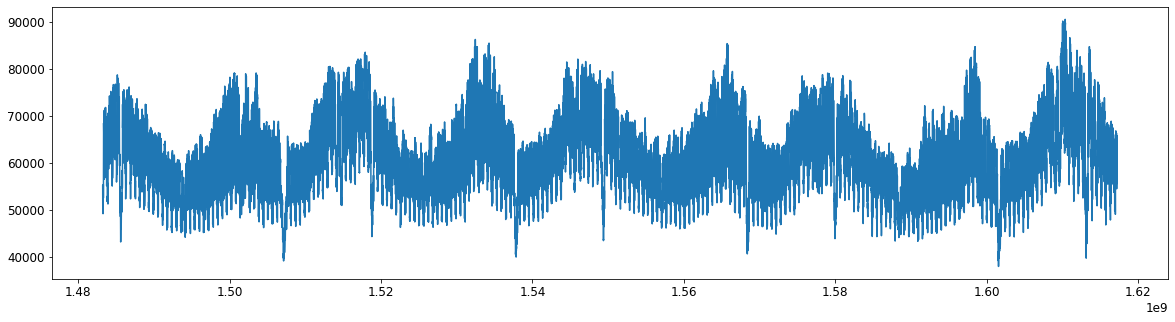

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

xn = korea_electricity_df['korea_electricity']
t = korea_electricity_df['timestamp']
plt.plot(t, xn)

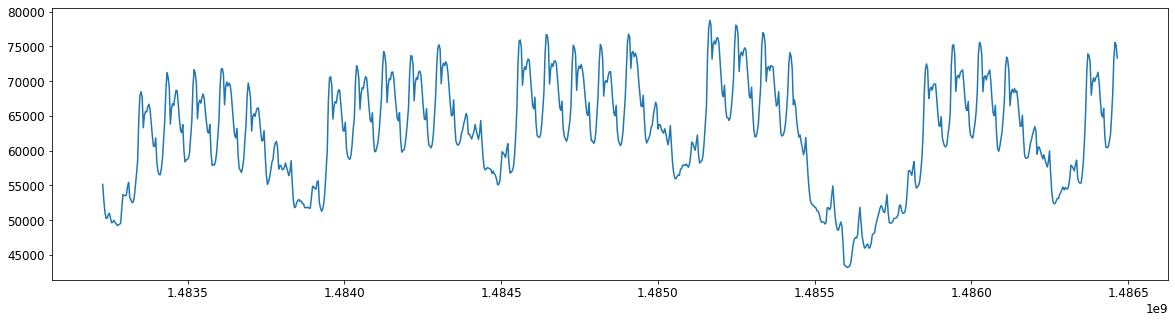

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]
start = 0
stop = 900
plt.plot(t[start:stop], xn[start:stop])

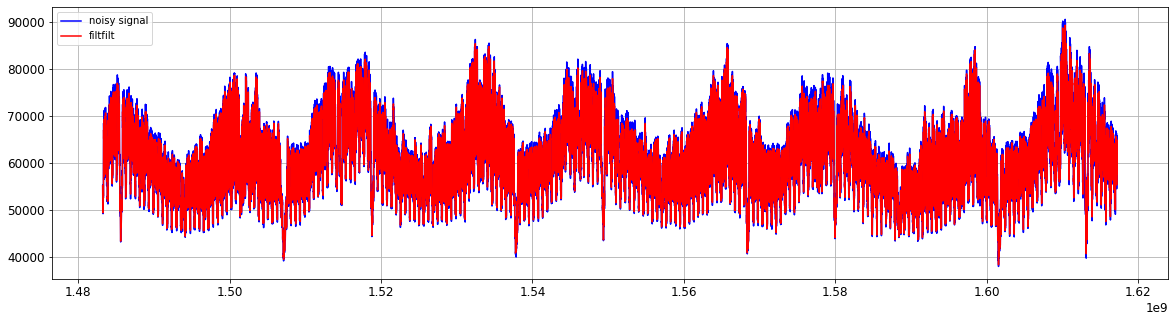

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#filter variable
b, a = signal.butter(1, 0.3)

y = signal.filtfilt(b, a, xn)

plt.figure
plt.subplot(1,1,1)
plt.plot(t, xn, 'b')
plt.plot(t, y, 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()


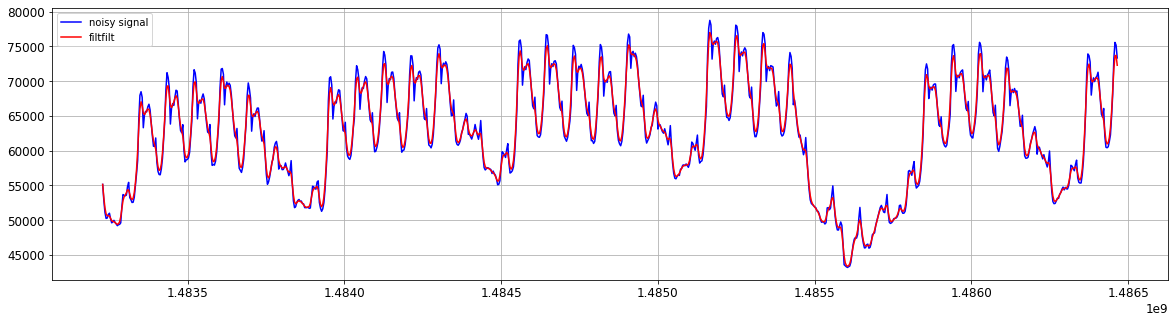

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#zoom in
start=0
stop=900

plt.figure
plt.subplot(1,1,1)
plt.plot(t[start:stop], xn[start:stop], 'b')
plt.plot(t[start:stop], y[start:stop], 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()


In [ ]:
#assign the filter result into dataframe
korea_electricity_df['korea_electricity'] = y

save

In [3]:
# #save the dataframe into drive
# korea_electricity_df.to_csv('./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/korea_eletricity_consumption_filter_20210814.csv', sep=',', na_rep='Na')

NameError: ignored

In [4]:
#load the dataframe from drive
korea_electricity_df = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/korea_eletricity_consumption_filter_20210814.csv", index_col=0) 

## merge

In [7]:
df_data.head()

,timestamp,electricity,year,month,date,day,time,temperature,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,4972.864469,2019,1,10,3,0,0.200089,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,4827.328137,2019,1,10,3,1,-0.084427,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,4714.399517,2019,1,10,3,2,-0.241907,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4
3,1.547089e+09,4640.463765,2019,1,10,3,3,-0.212708,0.0,0.0,0,42,2.5,-11.6,1019.0,1028.2,10.0,1983,-1.3
4,1.547093e+09,4619.087983,2019,1,10,3,4,-0.096140,0.0,0.0,0,35,2.1,-13.6,1018.6,1027.8,10.0,2000,-1.3


In [9]:
df_data.shape

(8093, 19)

In [10]:
#merge with df_data
if('korea_electricity' not in df_data.columns):
  df_data = pd.merge(df_data, korea_electricity_df, how='inner', on='timestamp')

In [11]:
df_data.shape

(8093, 20)

# Data preprocessing


## Data cleaning
1. check the linear part from 1.55e+09 to 1.5580e+09
2. remove the outlier (electricity < 3000)

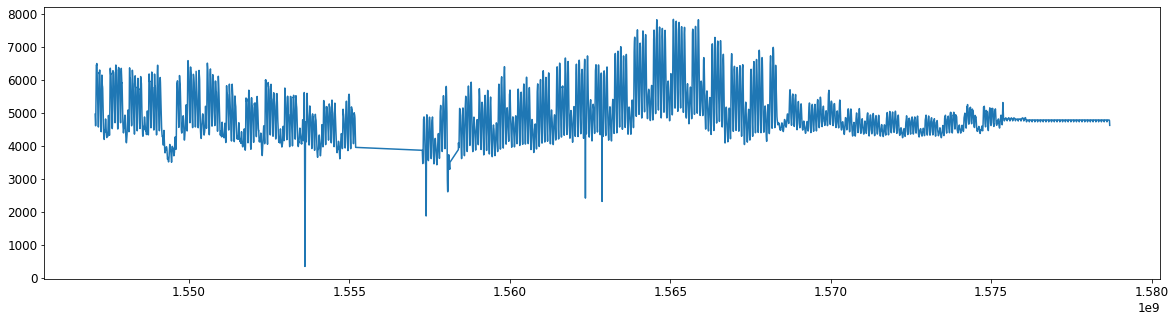

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity']
t = df_data['timestamp']
plt.plot(t, xn)

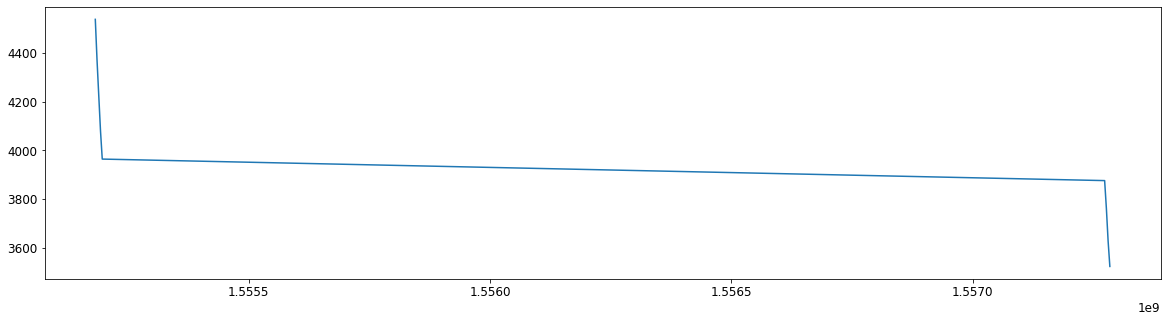

In [ ]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][2251:2260]
t = df_data['timestamp'][2251:2260]
plt.plot(t, xn)

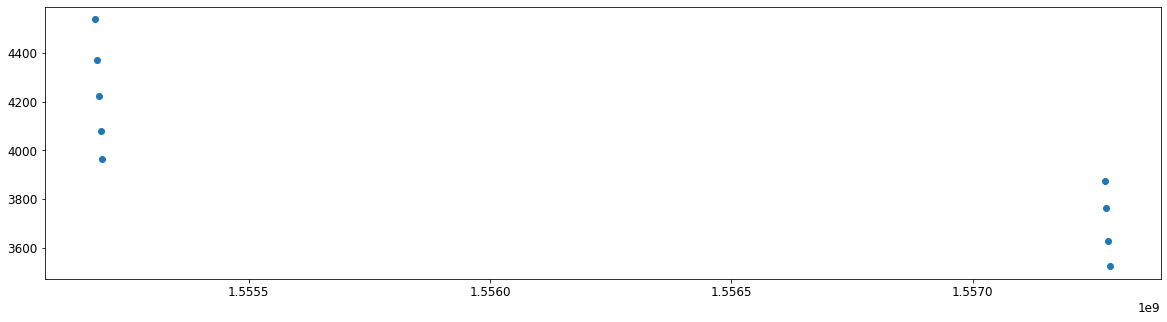

In [ ]:
plt.scatter(t, xn)

In [ ]:
t.describe()

count    9.000000e+00
mean     1.556118e+09
std      1.101432e+06
min      1.555182e+09
25%      1.555189e+09
50%      1.555196e+09
75%      1.557277e+09
max      1.557284e+09
Name: timestamp, dtype: float64

In [ ]:
t[2251]

1555182000.0

In [ ]:
min(t[t.values > 1.555e+09])

1555182000.0

In [ ]:
t[t.values < 1.555e+09]

Series([], Name: timestamp, dtype: float64)

In [ ]:
from datetime import datetime
timestamp = 1555182000.0
dt_obj = datetime.fromtimestamp(timestamp)
  
print("date_time:",dt_obj)
print("type of dt:",type(dt_obj))

date_time: 2019-04-13 19:00:00
type of dt: <class 'datetime.datetime'>


2. remove outlier (electricity < 3000)

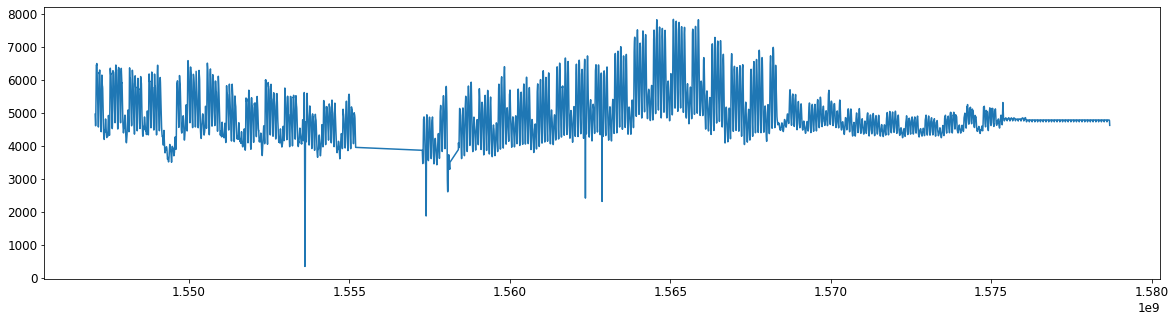

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity']
t = df_data['timestamp']
plt.plot(t, xn)

In [ ]:
xn[xn < 3000]

1814    1790.602646
1815     630.783593
1816     355.703647
1817     579.534786
1818    1616.223290
2288    2830.776447
2289    1885.026477
2290    2025.282513
2473    2974.558004
2474    2767.635973
2475    2660.465081
2476    2619.233138
2477    2620.406148
2478    2678.530862
2479    2846.278557
3595    2595.342575
3596    2427.658871
3739    2436.274336
3740    2326.972609
Name: electricity, dtype: float64

from 1814 to 1817

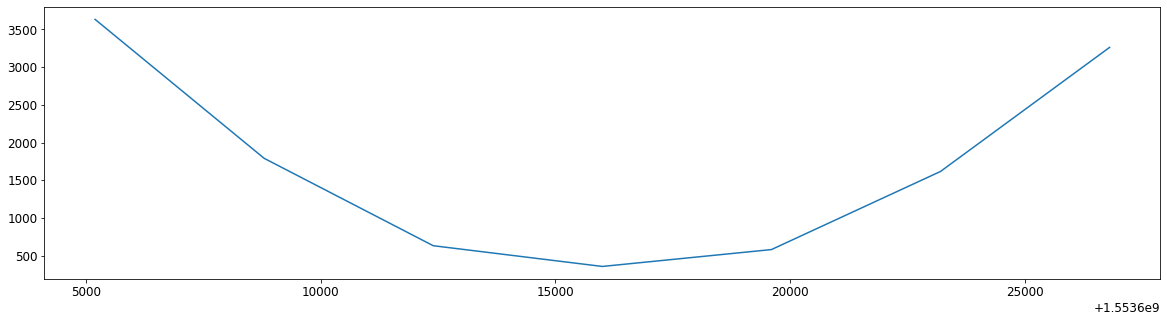

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][1813:1820]
t = df_data['timestamp'][1813:1820]
plt.plot(t, xn)

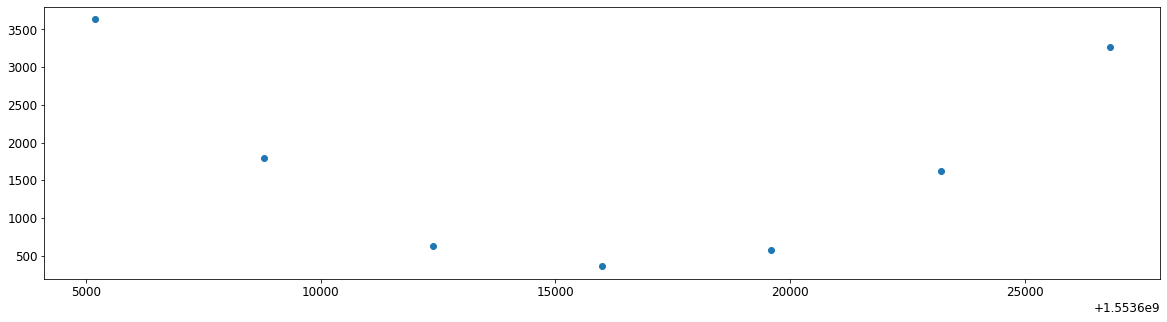

In [ ]:
plt.scatter(t, xn)

from 2288 to 2290

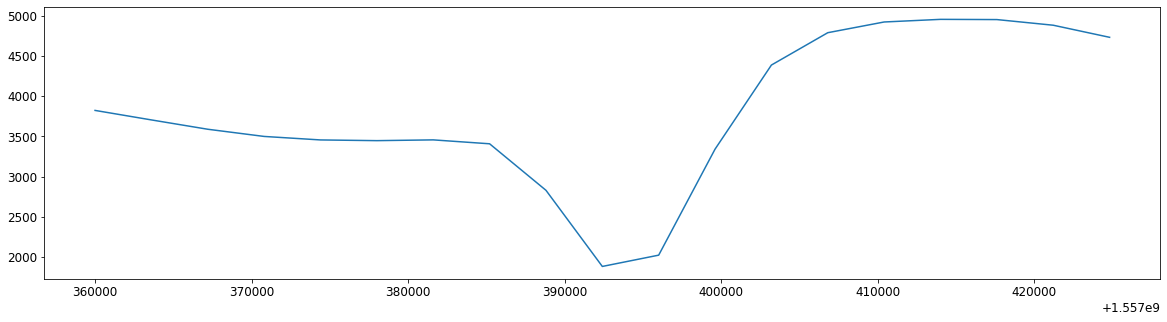

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][2280:2299]
t = df_data['timestamp'][2280:2299]
plt.plot(t, xn)

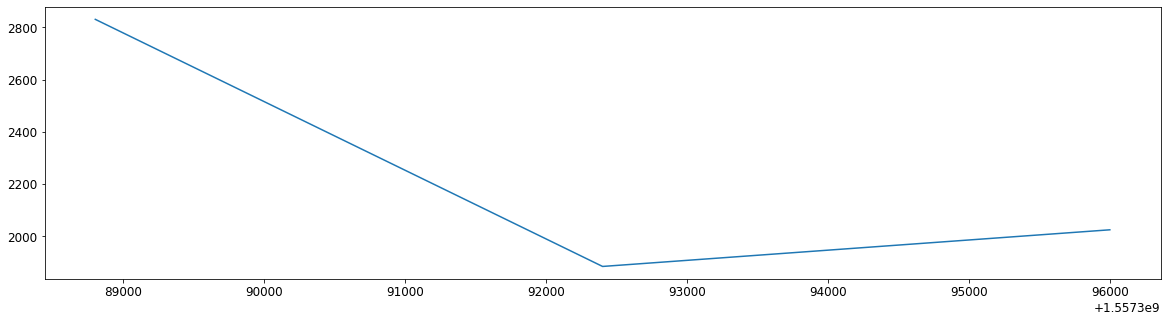

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][2288:2291]
t = df_data['timestamp'][2288:2291]
plt.plot(t, xn)

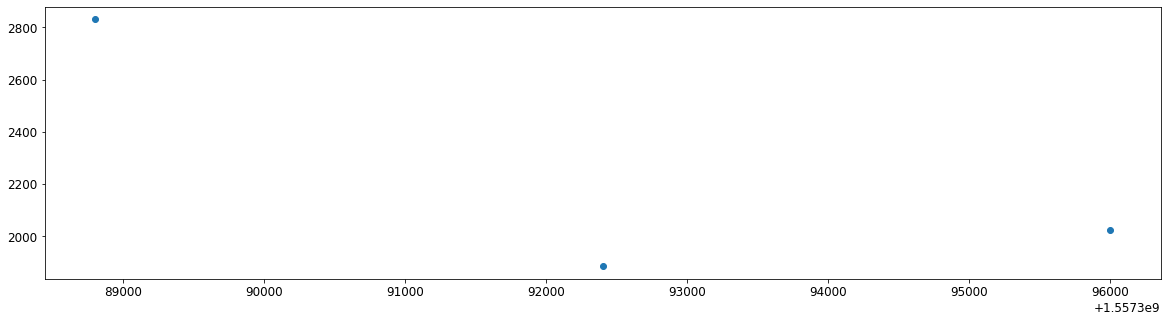

In [ ]:
plt.scatter(t, xn)

from 2473 to 2479

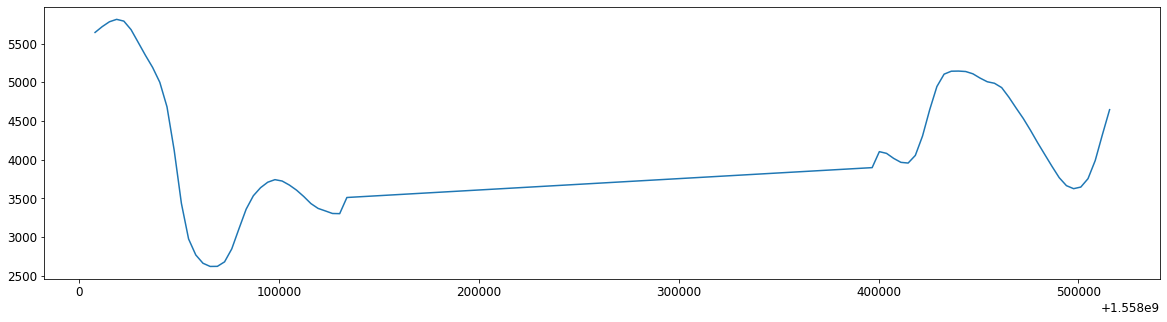

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][2460:2530]
t = df_data['timestamp'][2460:2530]
plt.plot(t, xn)

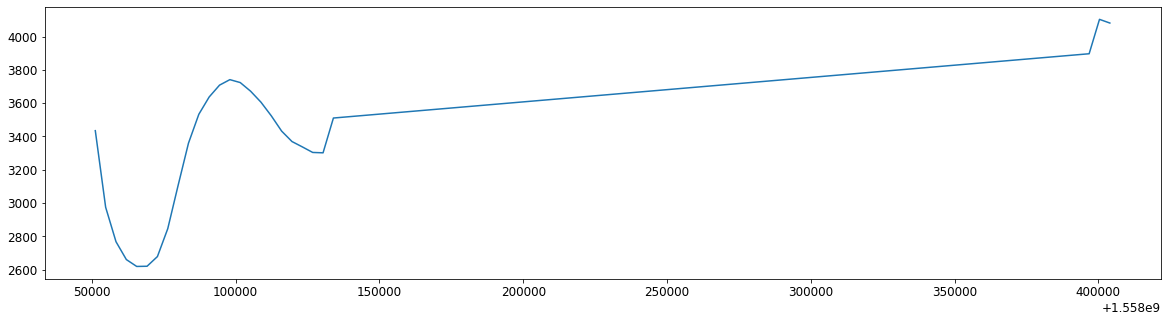

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][2472:2499]
t = df_data['timestamp'][2472:2499]
plt.plot(t, xn)

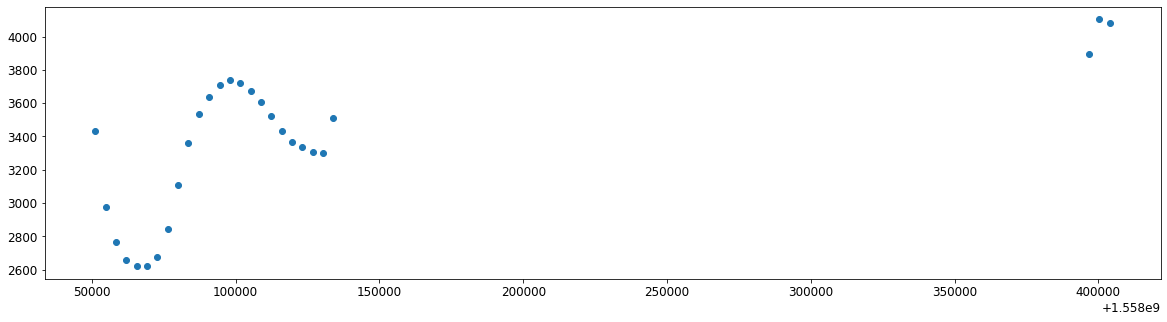

In [ ]:
plt.scatter(t, xn)

from 3595 to 3596

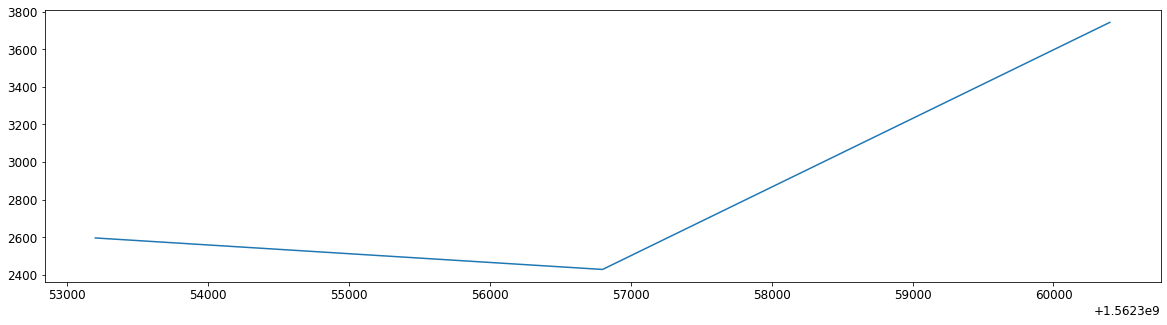

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][3595:3598]
t = df_data['timestamp'][3595:3598]
plt.plot(t, xn)

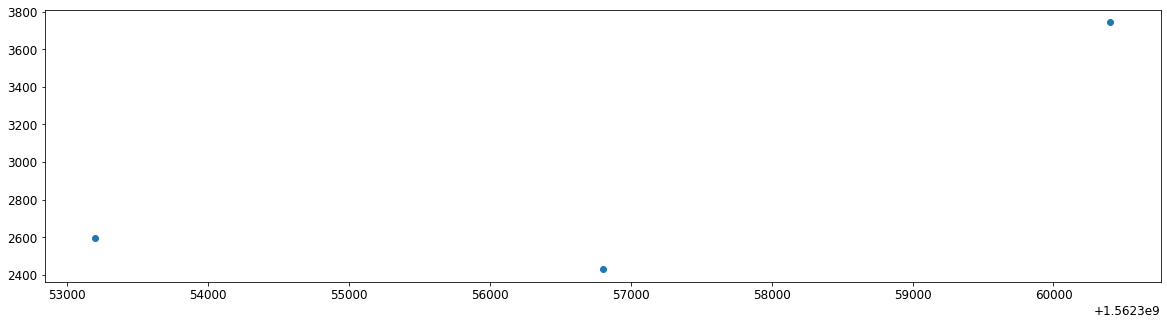

In [ ]:
plt.scatter(t, xn)

from 3739 to 3740

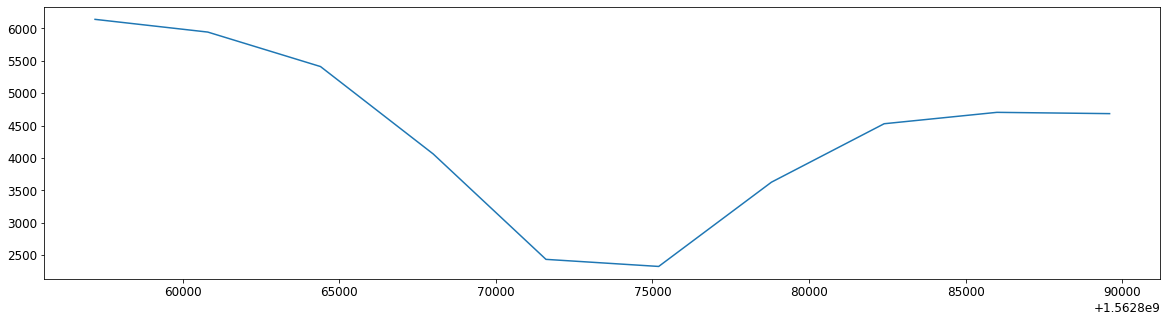

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][3735:3745]
t = df_data['timestamp'][3735:3745]
plt.plot(t, xn)

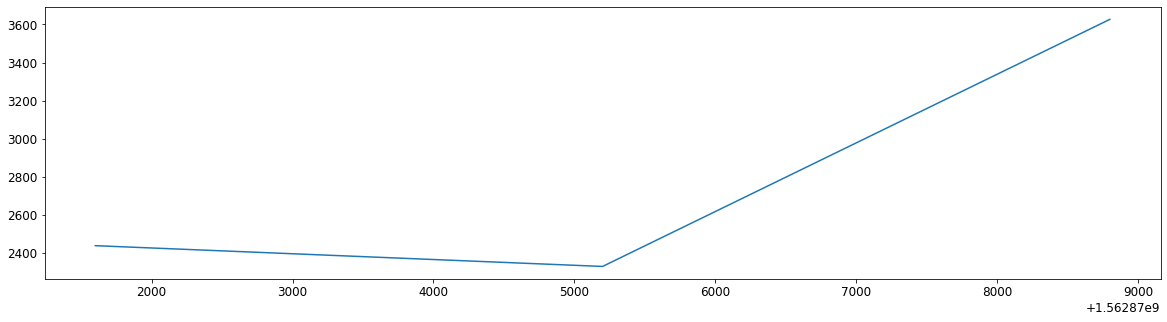

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data['electricity'][3739:3742]
t = df_data['timestamp'][3739:3742]
plt.plot(t, xn)

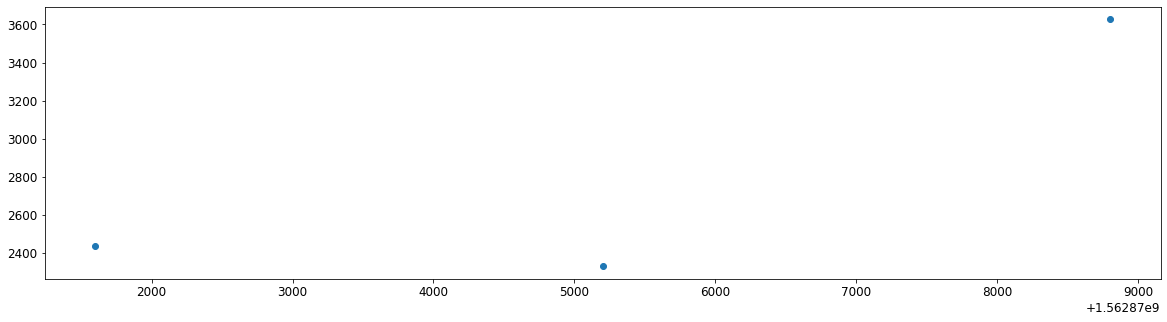

In [ ]:
plt.scatter(t, xn)

remove area:
- [1813:1820]
- already removed area
- [2288:2291]
- [2472:2499]
- [3595:3598]
- [3739:3742] 


In [ ]:
list(range(1813,1820))

[1813, 1814, 1815, 1816, 1817, 1818, 1819]

In [ ]:
list(range(3595,3598))

[3595, 3596, 3597]

In [ ]:
list(range(3739,3742))

[3739, 3740, 3741]

In [ ]:
#remove outlier data (the sequence of removal is important to keep the consistency of index)
df_data2 = df_data
df_data2 = df_data2.drop(list(range(3739,3742)), axis=0)
df_data2 = df_data2.drop(list(range(3595,3598)), axis=0)
df_data2 = df_data2.drop(list(range(2472,2499)), axis=0)
df_data2 = df_data2.drop(list(range(2288,2291)), axis=0)
df_data2 = df_data2.drop(list(range(1813,1820)), axis=0)

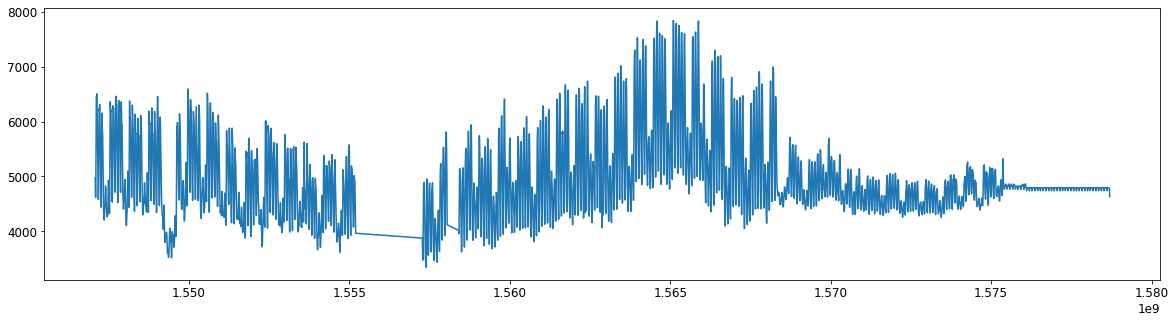

In [ ]:
#totall
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#plot
xn = df_data2['electricity']
t = df_data2['timestamp']
plt.plot(t, xn)

In [ ]:
df_data = df_data2
del df_data2 

## data type

In [13]:
df_data.head(3)

,timestamp,electricity,year,month,date,day,time,temperature,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C),korea_electricity
0,1.547078e+09,4972.864469,2019,1,10,3,0,0.200089,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5,67139.827867
1,1.547082e+09,4827.328137,2019,1,10,3,1,-0.084427,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4,65718.014926
2,1.547086e+09,4714.399517,2019,1,10,3,2,-0.241907,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4,64949.619496


In [14]:
df_data.dtypes

timestamp            float64
electricity          float64
year                   int64
month                  int64
date                   int64
day                    int64
time                   int64
temperature          float64
강수량(mm)              float64
풍속(m/s)              float64
풍향(16방위)               int64
습도(%)                  int64
증기압(hPa)             float64
이슬점온도(°C)            float64
현지기압(hPa)            float64
해면기압(hPa)            float64
전운량(10분위)            float64
시정(10m)                int64
지면온도(°C)             float64
korea_electricity    float64
dtype: object

drop datatime

In [ ]:
if 'datetime' in df_data.columns:
  df_data = df_data.drop('datetime', axis=1)

convert the datatype of time' into int

In [ ]:
df_data['time'] = map(lambda x: int(x[0:2]), df_data['time'])

TypeError: ignored

In [ ]:
df_data.head(3)

,timestamp,electricity,year,month,date,day,time,temperature,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,4972.864469,2019,1,10,3,0,0.200089,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,4827.328137,2019,1,10,3,1,-0.084427,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,4714.399517,2019,1,10,3,2,-0.241907,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4


merge korea_electricity

## file save and load

In [15]:
# #save the processed data
# #save the dataframe into drive
# df_data.to_csv('./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load_processed_data_20210817.csv', sep=',', na_rep='Na')

In [5]:
# #load the dataframe from drive
# df_data = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/Load_processed_data_20210812.csv", index_col=0) 

In [6]:
df_data.head()

,timestamp,electricity,year,month,date,day,time,temperature,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,4972.864469,2019,1,10,3,0,0.200089,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,4827.328137,2019,1,10,3,1,-0.084427,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,4714.399517,2019,1,10,3,2,-0.241907,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4
3,1.547089e+09,4640.463765,2019,1,10,3,3,-0.212708,0.0,0.0,0,42,2.5,-11.6,1019.0,1028.2,10.0,1983,-1.3
4,1.547093e+09,4619.087983,2019,1,10,3,4,-0.096140,0.0,0.0,0,35,2.1,-13.6,1018.6,1027.8,10.0,2000,-1.3


# timestamp

In [ ]:
#import library
#from datetime import datetime
#import time


In [ ]:
#filename = 'Peak03-2019-01-31.xls'
#split = filename.split('-', 1) #split by '-'; one time
#date = split[1].split('.')[0]

#print(date)

In [ ]:
#timestamp example
#print(date + ' ' + df_data.columns[0])
#timestamp = time.mktime(datetime.strptime(date + ' ' + df_data.columns[0], '%Y-%m-%d %H:%M').timetuple())
#print(timestamp)

In [ ]:
# #initialization
# timestamp = [0] * len(df_data.columns)#

# #for loop
# for i in range(len(df_data.columns)):
#  timestamp[i] = time.mktime(datetime.strptime(date + ' ' + df_data.columns[i], '%Y-%m-%d %H:%M').timetuple())#

# rint(timestamp)
  

# feature selection and modeling preparation

## features significence

In [ ]:
df_data.head(3)

,timestamp,electricity,year,month,date,day,time,temperature,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,4972.864469,2019,1,10,3,0,0.200089,0.0,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,4827.328137,2019,1,10,3,1,-0.084427,0.0,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,4714.399517,2019,1,10,3,2,-0.241907,0.0,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4


In [ ]:
df_data.shape

(8093, 19)

In [ ]:
df_data.iloc[:, 0].head()

0    1.547078e+09
1    1.547082e+09
2    1.547086e+09
3    1.547089e+09
4    1.547093e+09
Name: timestamp, dtype: float64

In [ ]:
#df_data.columns.values

In [ ]:
#df_data.columns.values[0:-1]

In [ ]:
#df_data.columns.values[1:]

In [16]:
# correlation
corr = df_data.corr(method='pearson')
print(corr)

                   timestamp  electricity  ...  지면온도(°C)  korea_electricity
timestamp           1.000000    -0.011660  ...  0.127391          -0.055148
electricity        -0.011660     1.000000  ...  0.454906           0.633428
year                0.278708    -0.041752  ... -0.173866           0.098974
month               0.840054     0.007057  ...  0.229869          -0.117772
date               -0.001209     0.054572  ... -0.002976           0.047094
day                -0.008416    -0.006461  ... -0.007596          -0.368987
time                0.002965     0.295113  ...  0.164734           0.321971
temperature         0.192824     0.380005  ...  0.921429          -0.064204
강수량(mm)             0.021677     0.045517  ...  0.031095           0.002487
풍속(m/s)            -0.070830     0.230423  ...  0.196186           0.192416
풍향(16방위)           -0.164018     0.165331  ...  0.238157           0.113418
습도(%)               0.176682    -0.071612  ...  0.007366          -0.176961
증기압(hPa)    

In [17]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# split into input and output
X = df_data.iloc[:, 1:] #timestamp
y = df_data.iloc[:, 0]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
names = df_data.columns.values[1:]
for name, score in zip(names, model.feature_importances_):
  print(name, score)
print('------------------------------------------------------')

electricity 4.8691318645328e-07
year 0.1641875308458571
month 0.8298849282469517
date 0.005836185661765732
day 4.891873361976034e-05
time 2.1977916794647093e-06
temperature 6.764042455895493e-07
강수량(mm) 2.687023373225491e-08
풍속(m/s) 2.711072603142201e-07
풍향(16방위) 1.3002849610985465e-07
습도(%) 5.492011958910649e-07
증기압(hPa) 3.6728833845211496e-06
이슬점온도(°C) 3.936398224801228e-06
현지기압(hPa) 1.4493666814833007e-05
해면기압(hPa) 1.099987486407661e-05
전운량(10분위) 8.007781093506881e-07
시정(10m) 9.965253005783227e-07
지면온도(°C) 3.428553540672571e-07
korea_electricity 2.855213455813887e-06
------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54693 missing from current font.
  font.set_

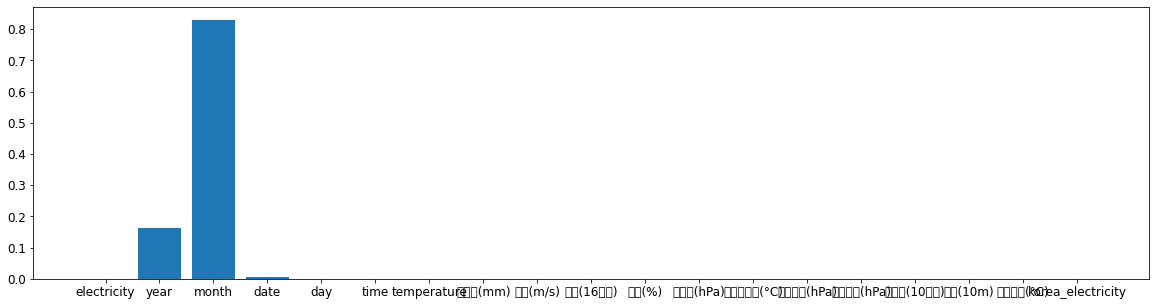

In [18]:
# plot importance scores
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

del X, y, model, names, ticks

NameError: ignored

In [ ]:
# #drop 강수량
# df_data = df_data.drop(columns=['강수량(mm)'])

In [ ]:
df_data.columns

Index(['timestamp', 'electricity', 'year', 'month', 'date', 'day', 'time',
       'temperature', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '전운량(10분위)', '시정(10m)',
       '지면온도(°C)'],
      dtype='object')

In [ ]:
ls './drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/'

energy_list_totalsum.csv
Load/
Load_processed_data_20210811.csv
Load_processed_data_20210812.csv
Load_processed_weather_20210811.csv
Load_raw_data_20210807.csv
Load_raw_data_electricity_20210811.csv
Load_raw_data_electricity_20210812_allInfo.csv
proc_electricity.csv
PV/
PV_lstm_deep_11/
PV_lstm_deep_11-20210807T133259Z-001.zip
PV_total_sum_new.csv
weather/


In [ ]:
# df_data

,electricity,date,timestamp,기온(°C),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,4972.864469,3,1.547078e+09,0.2,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,4827.328137,3,1.547082e+09,-0.2,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,4714.399517,3,1.547086e+09,-0.5,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4
3,4640.463765,3,1.547089e+09,-0.3,0.0,0,42,2.5,-11.6,1019.0,1028.2,10.0,1983,-1.3
4,4619.087983,3,1.547093e+09,0.0,0.0,0,35,2.1,-13.6,1018.6,1027.8,10.0,2000,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8131,4792.175115,4,1.578683e+09,3.6,1.4,50,49,3.9,-6.1,1013.2,1022.2,6.0,1767,0.3
8132,4787.106920,4,1.578686e+09,3.1,1.9,50,51,3.9,-6.0,1013.2,1022.3,5.0,1497,-0.3
8133,4771.508619,4,1.578690e+09,2.1,1.4,50,58,4.1,-5.3,1013.0,1022.1,7.0,1240,-1.0
8134,4723.501988,4,1.578694e+09,2.0,2.0,20,59,4.2,-5.1,1013.0,1022.1,7.0,1093,-1.1


## split

In [ ]:
def split_train_test(data, test_ratio): 
  '''
  data : dataframe
  test_ratio : float (e.g.) 0.2
  '''
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
def split_train_validation_test_indices(length, validation_ratio, test_ratio): 
  '''
  OVERVIEW
  split indices into training, validation, and training set randomly.

  INPUT
  length : integer
  validation_ratio : float (e.g.) 0.2
  test_ratio : float (e.g.) 0.2
  
  OUTPUT
  train_indices : list of indices
  test_indices : list of indices
  '''
  shuffled_indices = np.random.permutation(length)
  validation_set_size = int(length * validation_ratio)
  test_set_size = int(length * test_ratio)
  #print(validation_set_size, test_set_size)

  test_indices = shuffled_indices[:test_set_size]
  validation_indices = shuffled_indices[test_set_size:test_set_size+validation_set_size]
  train_indices = shuffled_indices[test_set_size+validation_set_size:]
  return train_indices, validation_indices, test_indices

In [ ]:
training_indices, validation_indices, test_indices = split_train_validation_test_indices(df_data.shape[0],0.2,0.1)

In [ ]:
training_indices.sort()
validation_indices.sort()
test_indices.sort()

In [ ]:
#print(training_indices)

In [ ]:
df_data.shape

(8093, 18)

In [ ]:
#split data into train, validation, and test set
train_df = df_data.iloc[training_indices, :]
valid_df = df_data.iloc[validation_indices, :]
test_df = df_data.iloc[test_indices, :]

num_features = df_data.shape[1]

In [ ]:
# #split data into train, validation, and test set
# x_train = df_data.iloc[training_indices, 1:] #timestamp
# y_train = df_data.iloc[training_indices, 0] #electricity (total_sum)
# x_valid = df_data.iloc[validation_indices, 1:]
# y_valid = df_data.iloc[validation_indices, 0]
# x_test = df_data.iloc[test_indices, 1:]
# y_test = df_data.iloc[test_indices, 0]

In [ ]:
# x_train.shape

In [ ]:
# x_train.head()

In [ ]:
# y_train.shape

In [ ]:
# x_train.shape

## split time-series data

In [ ]:
# import math
# math.floor(df_data.shape[0]*0.7)
# round(df_data.shape[0]*0.7)

In [ ]:
# #split data into train, validation, and test set
# training_indices = round(df_data.shape[0]*0.7)
# validation_indices = round((df_data.shape[0]-round(df_data.shape[0]*0.7))*(2/3))

# train_df = df_data.iloc[0:training_indices, :]
# valid_df = df_data.iloc[training_indices:training_indices+validation_indices, :]
# test_df = df_data.iloc[validation_indices:, :]

# num_features = df_data.shape[1]

In [ ]:
%time
#column indices
column_indices = {name: i for i, name in enumerate(df_data.columns)}

#split data into train, validation, and test set
import random
num_data = df_data.shape[0]
test_size = int(num_data*0.1)

num_loop = 0
loop= 0
while(loop != 3):
  loop= 0

  ## (continuous) test set
  random_index = random.randint(0,num_data-1)
  test_indices = list(range(random_index, int(random_index+test_size)))
  if (random_index+test_size <= num_data): #check index does not over the df size
    loop = loop + 1
  else:
    continue

  ## (continuous) validation set
  buffer_start = test_indices[0]-test_size if test_indices[0]-test_size >=0 else 0
  buffer_end = test_indices[-1]+test_size if test_indices[-1]+test_size <= num_data else 0
  validation_indices = list(set(range(0, buffer_start)).union(range(buffer_end, num_data)))
  #validation_indices = list(set(list(range(num_data))).difference(set(list(range(buffer_start, buffer_end))))) # {total indices} - {test indices}
  random_index = random.sample(validation_indices, 1) #randomly choose one among validation_indices
  validation_indices = range(random_index[0], random_index[0]+int(num_data*0.2))
  ##training indices
  training_indices = training_indices = list(set(list(range(num_data))).difference(set(test_indices)).difference(set(validation_indices))) 
  ## {total indices} - {test indices} - {validation indices}

  #if (validation_indices[-1] <= num_data):
  if ((validation_indices[-1] < test_indices[0]) + (validation_indices[0] > test_indices[-1]) == 1 and validation_indices[-1] <= num_data):  #if the list is not NA
      loop = loop + 1 #'False' means it is good to go out of loop

  if (len(test_indices) + len(validation_indices) + len(training_indices) <= num_data):
    loop = loop + 1
  
  #print(loop) #debug

print("num_data: ", num_data)
print("num_loop: ", num_loop)
print("test_indices: ", test_indices[0], " ~ ", test_indices[-1])
print("validation_indices: ", validation_indices[0]," ~ " ,validation_indices[-1])


if (len(test_indices) + len(validation_indices) + len(training_indices) != num_data):
  print("num_training_indices : ", len(training_indices))
  print("num_validation_indices : ", len(validation_indices))
  print("num_test_indices : ", len(test_indices))
  print("ERRORR! check it!!!!")
else:
  print("num_training_indices : ", len(training_indices))
  print("num_validation_indices : ", len(validation_indices))
  print("num_test_indices : ", len(test_indices))

train_df = df_data.iloc[training_indices, :]
valid_df = df_data.iloc[validation_indices, :]
test_df = df_data.iloc[test_indices, :]

#(for training procedrue)
num_features = df_data.shape[1]

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.5 µs
num_data:  8093
num_loop:  0
test_indices:  59  ~  867
validation_indices:  3577  ~  5194
num_training_indices :  5666
num_validation_indices :  1618
num_test_indices :  809


In [ ]:
column_indices

{'date': 4,
 'day': 5,
 'electricity': 1,
 'month': 3,
 'temperature': 7,
 'time': 6,
 'timestamp': 0,
 'year': 2,
 '습도(%)': 10,
 '시정(10m)': 16,
 '이슬점온도(°C)': 12,
 '전운량(10분위)': 15,
 '증기압(hPa)': 11,
 '지면온도(°C)': 17,
 '풍속(m/s)': 8,
 '풍향(16방위)': 9,
 '해면기압(hPa)': 14,
 '현지기압(hPa)': 13}

## normalize

In [ ]:
train_df

,timestamp,electricity,year,month,date,day,time,temperature,풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
0,1.547078e+09,4972.864469,2019,1,10,3,0,0.200089,0.2,0,39,2.4,-12.1,1019.4,1028.6,9.0,1981,-1.5
1,1.547082e+09,4827.328137,2019,1,10,3,1,-0.084427,0.6,270,39,2.3,-12.5,1019.1,1028.3,10.0,1995,-1.4
2,1.547086e+09,4714.399517,2019,1,10,3,2,-0.241907,0.1,0,42,2.5,-11.8,1019.2,1028.4,9.0,1987,-1.4
3,1.547089e+09,4640.463765,2019,1,10,3,3,-0.212708,0.0,0,42,2.5,-11.6,1019.0,1028.2,10.0,1983,-1.3
4,1.547093e+09,4619.087983,2019,1,10,3,4,-0.096140,0.0,0,35,2.1,-13.6,1018.6,1027.8,10.0,2000,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8131,1.578683e+09,4792.175115,2020,1,10,4,19,3.962281,1.4,50,49,3.9,-6.1,1013.2,1022.2,6.0,1767,0.3
8132,1.578686e+09,4787.106920,2020,1,10,4,20,3.117073,1.9,50,51,3.9,-6.0,1013.2,1022.3,5.0,1497,-0.3
8133,1.578690e+09,4771.508619,2020,1,10,4,21,2.471138,1.4,50,58,4.1,-5.3,1013.0,1022.1,7.0,1240,-1.0
8134,1.578694e+09,4723.501988,2020,1,10,4,22,2.030177,2.0,20,59,4.2,-5.1,1013.0,1022.1,7.0,1093,-1.1


In [ ]:
train_df.iloc[:,1:].describe()

,electricity,year,month,date,day,time,temperature,풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C)
count,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000
mean,4767.320416,2019.042358,7.128133,15.614366,3.020649,11.490293,13.205284,1.402259,136.724321,67.303036,11.360272,6.411843,1009.383375,1018.061560,5.076244,1462.403989,14.858825
std,504.475313,0.201422,3.633787,8.824586,1.966291,6.915707,7.902284,1.151936,125.166088,21.779853,6.728957,9.203899,7.324201,7.584138,3.922631,596.024470,11.808131
min,3342.004722,2019.000000,1.000000,1.000000,0.000000,0.000000,-4.603642,0.000000,0.000000,9.000000,1.100000,-21.800000,985.000000,993.200000,0.000000,58.000000,-5.500000
25%,4459.708826,2019.000000,4.000000,8.000000,1.000000,6.000000,6.489144,0.600000,20.000000,51.000000,5.500000,-1.400000,1004.200000,1012.600000,0.000000,945.250000,5.325000
50%,4775.632246,2019.000000,6.000000,15.000000,3.000000,11.000000,12.977852,1.200000,70.000000,68.000000,9.700000,6.500000,1010.000000,1018.700000,6.000000,1752.500000,13.700000
75%,4945.659890,2019.000000,11.000000,23.000000,5.000000,17.000000,19.864164,2.000000,250.000000,87.000000,16.300000,14.300000,1014.700000,1023.500000,9.000000,2000.000000,22.200000
max,6737.251677,2020.000000,12.000000,31.000000,6.000000,23.000000,31.663441,10.300000,360.000000,99.000000,29.700000,23.900000,1029.000000,1038.400000,10.000000,2000.000000,55.100000


In [ ]:
#normalization of training data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
valid_df = (valid_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
# #normalization version2
# train_mean = train_df.mean()
# train_std = train_df.std()

# train_df = (train_df - train_mean)
# valid_df = (valid_df - train_mean) 
# test_df = (test_df - train_mean) 

In [ ]:
# #normalization of training data (version3)
# train_mean = train_df.iloc[:,1:].mean()
# train_std = train_df.iloc[:,1:].std()

# train_df.iloc[:,1:] = (train_df.iloc[:,1:] - train_mean) / train_std
# valid_df.iloc[:,1:] = (valid_df.iloc[:,1:] - train_mean) / train_std
# test_df.iloc[:,1:] = (test_df.iloc[:,1:] - train_mean) / train_std

In [ ]:
# #visualize the result of normalization (after normalization)
# df_std = (df_data - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df_data.keys(), rotation=90)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54693 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_

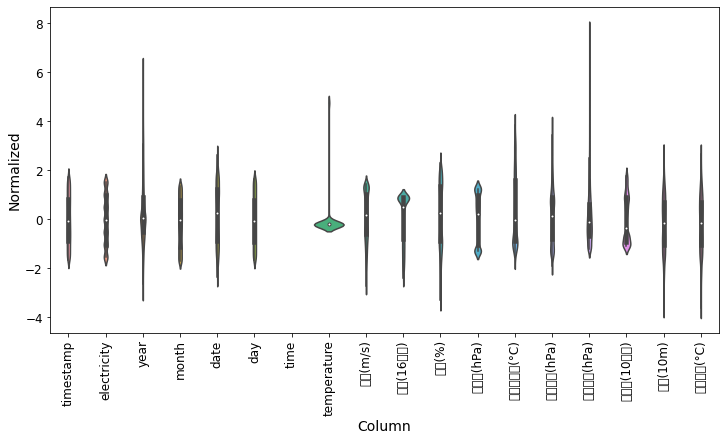

In [ ]:
#visualize the result of normalization (only training data ;after normalization)
df_std = df_data
df_std = (df_data.iloc[:,1:] - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_data.keys(), rotation=90)

In [ ]:
#df_std

In [ ]:
# #convert input files into numpy array
# ##variable
# time_steps = 24
# batch_size = int(len(training_indices) / time_steps)
# input_dimensionality = 13 #the number of input features 
# output_dimensionality = 1

# #convert padnas dataframe into numpy array
# x_train, y_train = np.array(x_train), np.array(y_train)
# x_valid, y_valid = np.array(x_valid), np.array(y_valid)
# x_test, y_test = np.array(x_test), np.array(y_test)

# #reshpae the data : [batch size, time_steps (seq_length), dimensionality (input_features)]
# # our example : [#data / 24, 24, 2]
# x_train = np.reshape(x_train, [batch_size, time_steps, input_dimensionality]) 
# y_train = np.reshape(y_train, [batch_size, time_steps, output_dimensionality])
# x_valid = np.reshape(x_valid, [int(len(validation_indices) / time_steps), time_steps, input_dimensionality]) 
# y_valid = np.reshape(y_valid, [int(len(validation_indices) / time_steps), time_steps, output_dimensionality])
# x_test = np.reshape(x_test, [int(len(test_indices) / time_steps), time_steps, input_dimensionality]) 
# y_test = np.reshape(y_test, [int(len(test_indices) / time_steps), time_steps, output_dimensionality])

In [ ]:
# print("x_train : ", x_train.shape)
# print("y_train : ", y_train.shape)
# print("x_valid : ", x_valid.shape)
# print("y_valid : ", y_valid.shape)
# print("x_test : ", x_test.shape)
# print("y_test : ", y_test.shape)

# Data windowing
- Indexes and offsets : Handle the indexes and offsets as shown in the diagrams above.
- Split :Split windows of features into a `(features, labels)` pairs.
- Plot : Plot the content of the resulting windows.
- Create tf.data.Datasets : Efficiently generate batches of these windows from the training, evaluation, and test data, using `tf.data.Datasets`.



In [ ]:
#indices and offsets
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, 
               train_df=train_df, val_df=valid_df, test_df=test_df, batch_size = 32,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.batch_size = batch_size

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # divde x and y
    self.train_x = self.train_df.drop(list(self.label_columns_indices.keys()), axis=1)
    self.train_y = self.train_df.iloc[:, list(self.label_columns_indices.values())]
    self.val_x = self.train_df.drop(list(self.label_columns_indices.keys()), axis=1)
    self.val_y = self.train_df.iloc[:, list(self.label_columns_indices.values())]
    self.test_x = self.train_df.drop(list(self.label_columns_indices.keys()), axis=1)
    self.test_y = self.train_df.iloc[:, list(self.label_columns_indices.values())]

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift
    #self.batch_size = self.train_df.shape[0] // self.input_width

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
#Split
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    inputs = features[:, self.input_slice, :] 
      ##(batch, time, features)
      ##input features except electricity
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)
    print("labels in split_window: ", labels)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])
  print("(split_windows) input shape:", inputs.shape)
  print("(split_windows) labels shape:", labels.shape)

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Plot
def plot(self, model=None, plot_col='electricity', max_subplots=3):
  inputs, labels = self.example #inputs for plot
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
#Create tf.data.Datasets
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=self.batch_size,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

The `WindowGenerator` object holds training, validation and test data. Add properties for accessing them as `tf.data.Datasets` using the above `make_dataset` method. Also add a standard example batch for easy access and plotting:

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])

Total window size: 7   
Input indices: [0 1 2 3 4 5]   
Label indices: [6]   
Label column name(s): ['T (degC)']   

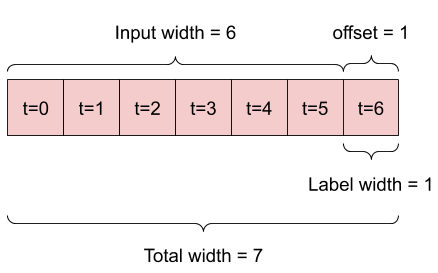


Split the window 


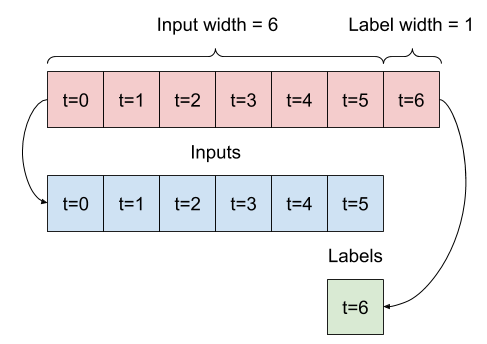

In [ ]:
# w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
#                      label_columns=['T (degC)'])

In [ ]:
# # Stack three slices, the length of the total window:
# example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
#                            np.array(train_df[100:100+w2.total_window_size]),
#                            np.array(train_df[200:200+w2.total_window_size])])


# example_inputs, example_labels = w2.split_window(example_window)

# print('All shapes are: (batch, time, features)')
# print(f'Window shape: {example_window.shape}')
# print(f'Inputs shape: {example_inputs.shape}')
# print(f'labels shape: {example_labels.shape}')

In [ ]:
# w2.plot(plot_col='p (mbar)')

## compile

In [ ]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

## window definition

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['electricity'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['electricity']

In [ ]:
single_step_window.train

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 1, 18)
(split_windows) labels shape: (None, 1, 1)


<MapDataset shapes: ((None, 1, 18), (None, 1, 1)), types: (tf.float32, tf.float32)>

In [ ]:
train_df.shape

(5666, 18)

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=72, label_width=72, shift=24,
    label_columns=['electricity'])
wide_window

CPU times: user 12.5 ms, sys: 0 ns, total: 12.5 ms
Wall time: 12 ms


In [ ]:
wide_window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['electricity']

In [ ]:
wide_window.train
for i in wide_window.train:
  print(i)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       [[-1.03357911e+00],
        [-4.24084812e-01],
        [-9.36728939e-02],
        [ 1.67863593e-02],
        [ 6.08632304e-02],
        [ 1.45137325e-01],
        [ 2.23250791e-01],
        [ 2.11216360e-01],
        [ 1.58552244e-01],
        [ 6.41831309e-02],
        [-1.71903849e-01],
        [-4.85792875e-01],
        [-7.37694561e-01],
        [-9.50231850e-01],
        [-1.21233344e+00],
        [-1.49123502e+00],
        [-1.71835577e+00],
        [-1.91108906e+00],
        [-2.07065606e+00],
        [-2.16971064e+00],
        [-2.23333144e+00],
        [-2.26580024e+00],
        [-2.14302516e+00],
        [-1.76289618e+00]],

       [[ 2.69286066e-01],
        [ 1.95611134e-01],
        [ 5.34950159e-02],
        [-1.21845908e-01],
        [-2.84452111e-01],
        [-4.45949405e-01],
        [-6.27276182e-01],
        [-7.61713266e-01],
        [-8.05217862e-01],
        [-8.33707929e-01],
        [-8.72269690e-01],
        [-9.10155

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# single step model

## baseline

Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict temperature 1h in the future given the current value of all features. The current values include the current temperature.

So start with a model that just returns the current temperature as the prediction, predicting "No change". This is a reasonable baseline since temperature changes slowly. Of course, this baseline will work less well if you make a prediction further in the future.   
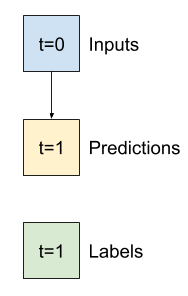

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['electricity'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 1, 18)
(split_windows) labels shape: (None, 1, 1)
51/51 [==============================] - 0s 1ms/step - loss: 0.1853 - mean_absolute_error: 0.3298
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 1, 18)
(split_windows) labels shape: (None, 1, 1)


## Linear model
The simplest **trainable** model you can apply to this task is to insert linear transformation between the input and output. In this case the output from a time step only depends on that step:     
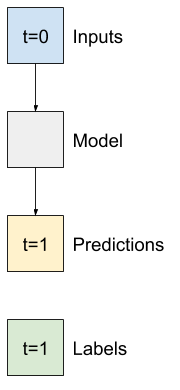   

A `layers.Dense` with no `activation` set is a linear model. The layer only transforms the last axis of the data from `(batch, time, inputs)` to `(batch, time, units)`, it is applied independently to every item across the `batch` and `time` axes.

In [ ]:
# import inspect
# inspect.getmembers(single_step_window, lambda a:not(inspect.isroutine(a)))

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 1, 18)
(split_windows) labels shape: (None, 1, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 1, 18)
(split_windows) labels shape: (None, 1, 1)
Epoch 1/50
178/178 [==============================] - 1s 3ms/step - loss: 1.6037 - mean_absolute_error: 1.0032 - val_loss: 4.1890 - val_mean_absolute_error: 1.7584
Epoch 2/50
178/178 [==============================] - 0s 2ms/step - loss: 0.5657 - mean_absolute_error: 0.5918 - val_loss: 1.4993 - val_mean_absolute_error: 0.9898
Epoch 3/50
178/178 [==============================] - 0s 2ms/step - loss: 0.2762 - mean_absolute_error: 0.4083 - val_loss: 0.7403 - val_mean_absolute_error: 0.6694
Epoch 4/50
178/178 [==============================] - 0s 2ms/step - loss: 0.1565 - mean_absolute_error: 0.3007 - val_loss: 0.4341 - val_mean_absolute_error: 0.4962
Epoch 5/50

In [ ]:
linear.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1, 1)              19        
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)


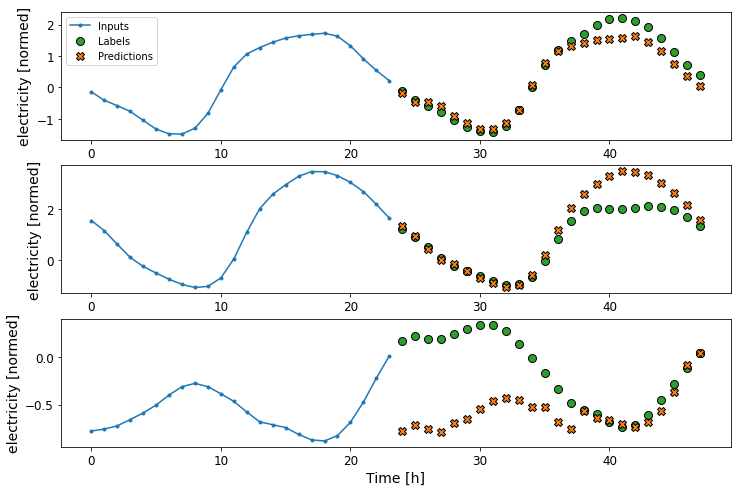

In [ ]:
wide_window.plot(linear)

In [ ]:
train

In [ ]:
single_step_window.train

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 1, 18)
(split_windows) labels shape: (None, 1, 1)


<MapDataset shapes: ((None, 1, 18), (None, 1, 1)), types: (tf.float32, tf.float32)>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54693 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_

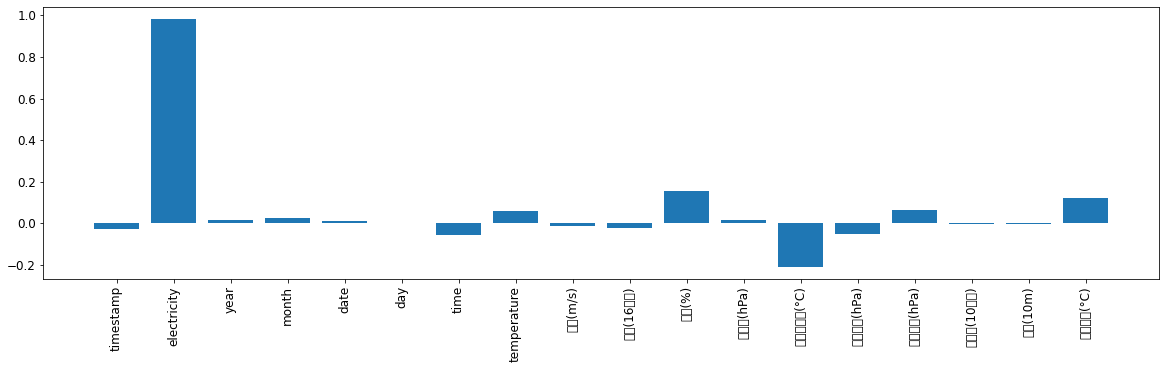

In [ ]:
#visualize the weight assigned to each input:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## LSTM

An important constructor argument for all keras RNN layers is the `return_sequences` argument. This setting can configure the layer in one of two ways.

1. If `False`, the default, the layer only returns the output of the final timestep, giving the model time to warm up its internal state before making a single prediction:   
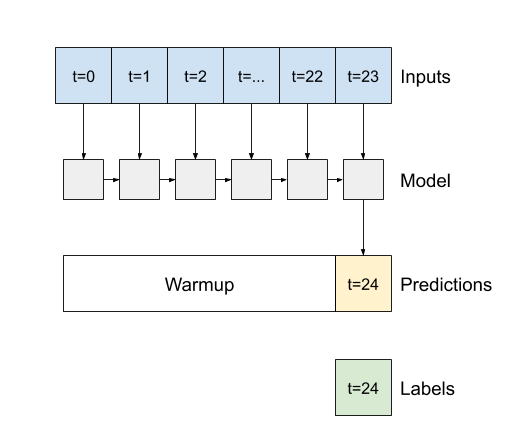

2. If `True` the layer returns an output for each input. This is useful for:
  * Stacking RNN layers. 
  * Training a model on multiple timesteps simultaneously.


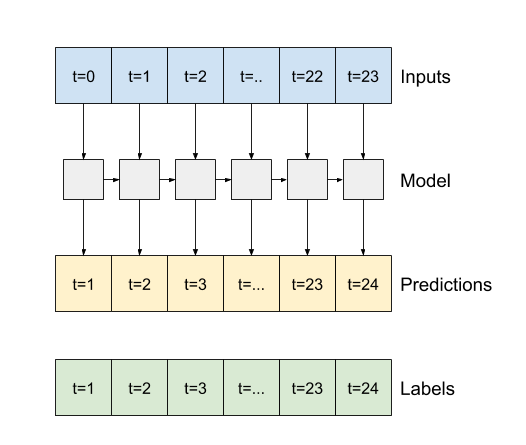

In [ ]:
def LSTM(rnn_units):
  return tf.kears.layers.LSTM(
      rnn_units,
      return_sequences = True,
      recurrent_initializer='glorot_uniform',
      recurrent_activation='sigmoid',
      stateful=True,
  )

In [ ]:
num_rnn_units = wide_window.input_width
print(num_rnn_units)

24


In [ ]:
lstm_model_1 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
])

In [ ]:
history_1 = compile_and_fit(lstm_model_1, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
Epoch 1/50
175/175 [==============================] - 38s 159ms/step - loss: 0.5045 - mean_absolute_error: 0.4736 - val_loss: 2.2094 - val_mean_absolute_error: 1.1001
Epoch 2/50
175/175 [==============================] - 26s 148ms/step - loss: 0.1852 - mean_absolute_error: 0.2686 - val_loss: 1.9718 - val_mean_absolute_error: 1.0454
Epoch 3/50
175/175 [==============================] - 26s 149ms/step - loss: 0.1308 - mean_absolute_error: 0.2141 - val_loss: 1.9472 - val_mean_absolute_error: 1.0540
Epoch 4/50
175/175 [==============================] - 26s 149ms/step - loss: 0.1032 - mean_absolute_error: 0.1843 - val_loss: 1.7803 - val_mean_absolute_error: 1

In [ ]:
lstm_model_2 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
])

In [ ]:
history_2 = compile_and_fit(lstm_model_2, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
Epoch 1/50
175/175 [==============================] - 82s 354ms/step - loss: 0.6845 - mean_absolute_error: 0.5763 - val_loss: 5.4853 - val_mean_absolute_error: 1.8017
Epoch 2/50
175/175 [==============================] - 55s 317ms/step - loss: 0.3376 - mean_absolute_error: 0.3744 - val_loss: 3.9749 - val_mean_absolute_error: 1.4914
Epoch 3/50
175/175 [==============================] - 55s 316ms/step - loss: 0.2334 - mean_absolute_error: 0.2971 - val_loss: 3.7948 - val_mean_absolute_error: 1.4755
Epoch 4/50
175/175 [==============================] - 56s 317ms/step - loss: 0.1932 - mean_absolute_error: 0.2600 - val_loss: 3.1920 - val_mean_absolute_error: 1

In [ ]:
lstm_model_3 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True),
    tf.keras.layers.Dropout(rate=0.1),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
])

In [ ]:
history_3 = compile_and_fit(lstm_model_3, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
Epoch 1/50
175/175 [==============================] - 32s 131ms/step - loss: 0.5085 - mean_absolute_error: 0.4793 - val_loss: 2.3974 - val_mean_absolute_error: 1.1484
Epoch 2/50
175/175 [==============================] - 21s 119ms/step - loss: 0.1941 - mean_absolute_error: 0.2863 - val_loss: 2.0526 - val_mean_absolute_error: 1.0928
Epoch 3/50
175/175 [==============================] - 21s 121ms/step - loss: 0.1410 - mean_absolute_error: 0.2397 - val_loss: 1.7261 - val_mean_absolute_error: 1.0060
Epoch 4/50
175/175 [==============================] - 21s 121ms/step - loss: 0.1141 - mean_absolute_error: 0.2137 - val_loss: 1.6479 - val_mean_absolute_error: 0

In [ ]:
lstm_model_4 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
])

In [ ]:
history_4 = compile_and_fit(lstm_model_4, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
Epoch 1/50
175/175 [==============================] - 49s 230ms/step - loss: 0.5113 - mean_absolute_error: 0.4837 - val_loss: 2.2966 - val_mean_absolute_error: 1.1466
Epoch 2/50
175/175 [==============================] - 39s 222ms/step - loss: 0.2093 - mean_absolute_error: 0.2993 - val_loss: 2.2005 - val_mean_absolute_error: 1.1180
Epoch 3/50
175/175 [==============================] - 40s 226ms/step - loss: 0.1535 - mean_absolute_error: 0.2534 - val_loss: 2.1072 - val_mean_absolute_error: 1.0886
Epoch 4/50
175/175 [==============================] - 40s 226ms/step - loss: 0.1253 - mean_absolute_error: 0.2290 - val_loss: 2.1050 - val_mean_absolute_error: 1

In [ ]:
lstm_model_5 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True),


    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
])

In [ ]:
history_5 = compile_and_fit(lstm_model_5, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
Epoch 1/50
175/175 [==============================] - 36s 169ms/step - loss: 213.0542 - mean_absolute_error: 1.1643 - val_loss: 6.4586 - val_mean_absolute_error: 1.9443
Epoch 2/50
175/175 [==============================] - 29s 164ms/step - loss: 51.7049 - mean_absolute_error: 0.9515 - val_loss: 6.4313 - val_mean_absolute_error: 1.9390
Epoch 3/50
175/175 [==============================] - 29s 165ms/step - loss: 13019.8398 - mean_absolute_error: 3.7548 - val_loss: 6.2974 - val_mean_absolute_error: 1.9129
Epoch 4/50
175/175 [==============================] - 29s 164ms/step - loss: 18.6608 - mean_absolute_error: 0.8807 - val_loss: 6.3009 - val_mean_absolute_

In [ ]:
lstm_model_6 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', return_sequences=True, recurrent_dropout=0.1),
    tf.keras.layers.Dropout(rate=0.1),


    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
])

In [ ]:
history_6 = compile_and_fit(lstm_model_6, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
Epoch 1/50
176/176 [==============================] - 43s 146ms/step - loss: 0.5738 - mean_absolute_error: 0.5222 - val_loss: 2.9708 - val_mean_absolute_error: 1.2787
Epoch 2/50
176/176 [==============================] - 24s 135ms/step - loss: 0.3071 - mean_absolute_error: 0.3706 - val_loss: 1.7826 - val_mean_absolute_error: 0.9677
Epoch 3/50
176/176 [==============================] - 24s 135ms/step - loss: 0.2127 - mean_absolute_error: 0.3088 - val_loss: 1.6798 - val_mean_absolute_error: 0.9584
Epoch 4/50
176/176 [==============================] - 23s 132ms/step - loss: 0.1608 - mean_absolute_error: 0.2682 - val_loss: 1.6758 - val_mean_absolute_error: 0

In [ ]:
lstm_model_7 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_rnn_units, return_sequences=True)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_rnn_units, return_sequences=True)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_rnn_units, return_sequences=True)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_rnn_units, return_sequences=True)),
    tf.keras.layers.Dropout(rate=0.1),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
])

In [ ]:
history_7 = compile_and_fit(lstm_model_7, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
Epoch 1/50
175/175 [==============================] - 48s 197ms/step - loss: 0.2980 - mean_absolute_error: 0.3523 - val_loss: 1.5257 - val_mean_absolute_error: 0.9205
Epoch 2/50
175/175 [==============================] - 27s 153ms/step - loss: 0.0685 - mean_absolute_error: 0.1775 - val_loss: 1.9826 - val_mean_absolute_error: 1.0350
Epoch 3/50
175/175 [==============================] - 27s 151ms/step - loss: 0.0474 - mean_absolute_error: 0.1470 - val_loss: 1.9590 - val_mean_absolute_error: 1.0300
Epoch 4/50
175/175 [==============================] - 27s 151ms/step - loss: 0.0376 - mean_absolute_error: 0.1306 - val_loss: 1.9023 - val_mean_absolute_error: 1

In [ ]:
lstm_model_8 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_rnn_units, return_sequences=True, recurrent_dropout=0.1)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_rnn_units, return_sequences=True, recurrent_dropout=0.1)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_rnn_units, return_sequences=True, recurrent_dropout=0.1)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_rnn_units, return_sequences=True, recurrent_dropout=0.1)),
    tf.keras.layers.Dropout(rate=0.1),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
])

In [ ]:
history_8 = compile_and_fit(lstm_model_8, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 72, 18)
(split_windows) labels shape: (None, 72, 1)
Epoch 1/50
175/175 [==============================] - 82s 362ms/step - loss: 0.2934 - mean_absolute_error: 0.3509 - val_loss: 1.6037 - val_mean_absolute_error: 0.9272
Epoch 2/50
175/175 [==============================] - 62s 354ms/step - loss: 0.0763 - mean_absolute_error: 0.1855 - val_loss: 1.3649 - val_mean_absolute_error: 0.8739
Epoch 3/50
175/175 [==============================] - 62s 355ms/step - loss: 0.0535 - mean_absolute_error: 0.1559 - val_loss: 1.1802 - val_mean_absolute_error: 0.8129
Epoch 4/50
175/175 [==============================] - 61s 350ms/step - loss: 0.0426 - mean_absolute_error: 0.1394 - val_loss: 1.1461 - val_mean_absolute_error: 0

In [ ]:
lstm_model_9 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)), #output dimension
    tf.keras.layers.Dense(24)
])

In [ ]:
history_9 = compile_and_fit(lstm_model_9, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
Epoch 1/50
176/176 [==============================] - 34s 112ms/step - loss: 0.5168 - mean_absolute_error: 0.4957 - val_loss: 1.6311 - val_mean_absolute_error: 0.9215
Epoch 2/50
176/176 [==============================] - 18s 105ms/step - loss: 0.2814 - mean_absolute_error: 0.3606 - val_loss: 2.0454 - val_mean_absolute_error: 1.0872
Epoch 3/50
176/176 [==============================] - 18s 102ms/step - loss: 0.2226 - mean_absolute_error: 0.3173 - val_loss: 1.9047 - val_mean_absolute_error: 1.0271
Epoch 4/50
176/176 [==============================] - 19s 106ms/step - loss: 0.1924 - mean_absolute_error: 0.2928 - val_loss: 1.9853 - val_mean_absolute_error: 1

In [ ]:
lstm_model_10 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(num_rnn_units, activation='selu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)), #output dimension
    tf.keras.layers.Dense(24)
])

In [ ]:
history_10 = compile_and_fit(lstm_model_10, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
Epoch 1/50
176/176 [==============================] - 29s 106ms/step - loss: 0.5821 - mean_absolute_error: 0.5310 - val_loss: 3.0570 - val_mean_absolute_error: 1.2816
Epoch 2/50
176/176 [==============================] - 17s 95ms/step - loss: 0.3169 - mean_absolute_error: 0.3834 - val_loss: 2.1062 - val_mean_absolute_error: 1.0559
Epoch 3/50
176/176 [==============================] - 17s 97ms/step - loss: 0.2515 - mean_absolute_error: 0.3388 - val_loss: 2.1246 - val_mean_absolute_error: 1.0521
Epoch 4/50
176/176 [==============================] - 17s 98ms/step - loss: 0.2220 - mean_absolute_error: 0.3161 - val_loss: 2.2799 - val_mean_absolute_error: 1.10

In [ ]:
# lstm_model = tf.keras.models.Sequential([
#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(32, activation='elu', return_sequences=True),
#     tf.keras.layers.Dropout(rate=0.1),
#     tf.keras.layers.LSTM(32, activation='elu', return_sequences=True),
#     tf.keras.layers.Dropout(rate=0.1),
#     tf.keras.layers.LSTM(32, activation='elu', return_sequences=True),
#     tf.keras.layers.Dropout(rate=0.1),
#     tf.keras.layers.LSTM(32, activation='elu', return_sequences=True),
#     tf.keras.layers.Dropout(rate=0.1),

#     # Shape => [batch, time, features]
#     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)) #output dimension
# ])

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),

    # Shape => [batch, time, features]
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24)), #output dimension
    tf.keras.layers.Dense(24)
])

In [ ]:
# lstm_model = tf.keras.models.Sequential([
#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(24, return_sequences=True),
#     # Shape => [batch, time, features]
#     tf.keras.layers.Dense(units=num_features)
# ])

In [ ]:
# lstm_model = tf.keras.models.Sequential([
#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(24, return_sequences=True),
#     # Shape => [batch, time, features]
#     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24))
# ])

In [ ]:
history = compile_and_fit(lstm_model, wide_window)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
Epoch 1/50
176/176 [==============================] - 29s 106ms/step - loss: 0.5916 - mean_absolute_error: 0.5316 - val_loss: 1.9784 - val_mean_absolute_error: 0.9966
Epoch 2/50
176/176 [==============================] - 18s 101ms/step - loss: 0.3141 - mean_absolute_error: 0.3813 - val_loss: 1.7176 - val_mean_absolute_error: 0.9432
Epoch 3/50
176/176 [==============================] - 18s 102ms/step - loss: 0.2400 - mean_absolute_error: 0.3316 - val_loss: 1.5219 - val_mean_absolute_error: 0.8967
Epoch 4/50
176/176 [==============================] - 18s 102ms/step - loss: 0.2096 - mean_absolute_error: 0.3087 - val_loss: 1.6355 - val_mean_absolute_error: 0

In [ ]:
wide_window.val

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)


<MapDataset shapes: ((None, 24, 18), (None, 24, 1)), types: (tf.float32, tf.float32)>

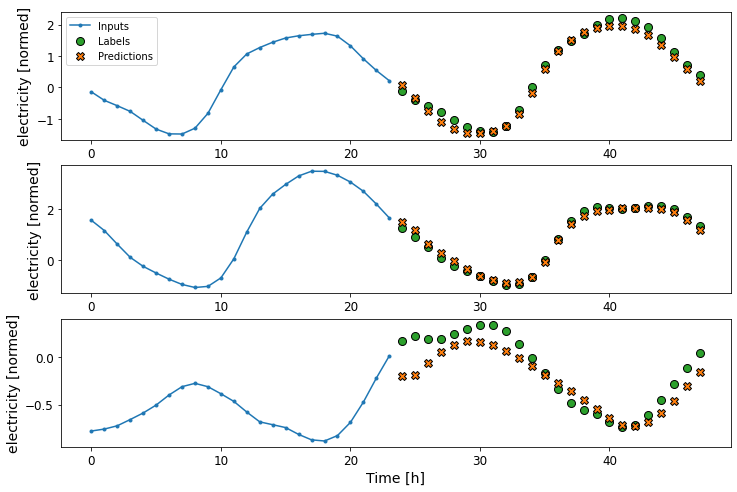

In [ ]:
wide_window.plot(lstm_model)

In [ ]:
ls '/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/model_save_2021.08.07'

ls: cannot access '/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/model_save_2021.08.07': No such file or directory


In [ ]:
#lstm_model.save('/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/model_save_2021.08.07')

In [ ]:
#new_model = tf.keras.models.load_model('/drive/MyDrive/Colab Notebooks/EnerGist_2021.07/model_save_2021.08.07')

In [ ]:
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)
50/50 [==============================] - 1s 15ms/step - loss: 2.1299 - mean_absolute_error: 1.0838
labels in split_window:  Tensor("stack:0", shape=(None, None, 1), dtype=float32)
(split_windows) input shape: (None, 24, 18)
(split_windows) labels shape: (None, 24, 1)


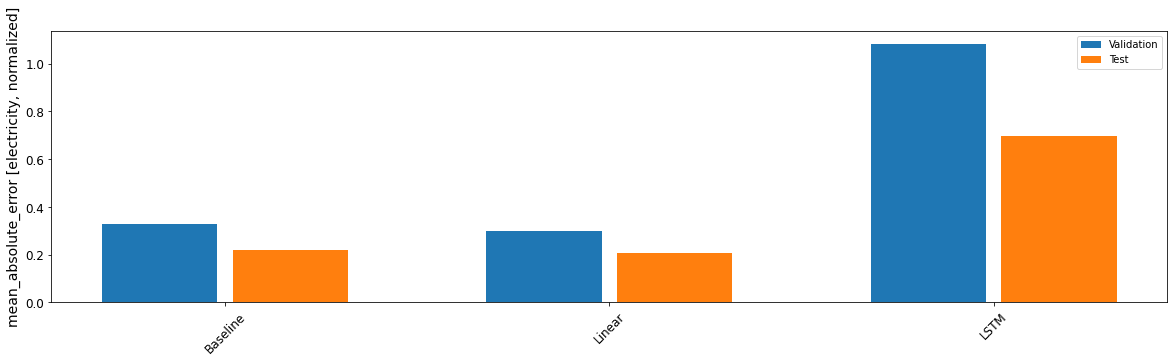

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [electricity, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.2206
Linear      : 0.2063
LSTM        : 0.6978


# multi step models

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

NameError: ignored

# LSTM

## LSTM Model

In [ ]:
def LSTM(rnn_units):
  return tf.keras.layers.LSTM(
      rnn_units,
      return_sequences=True,
      recurrent_initializer='glorot_uniform',
      recurrent_activation='sigmoid',
      stateful=True
  )

In [ ]:
#build model
#input dimension = [batch_size, timesteps, input_features]
model = tf.keras.Sequential([
                    #tf.keras.layers.Embedding(input_dim = 24, output_dim=24, batch_input_shape=[1,24]),
                    tf.keras.layers.LSTM(units=1, batch_input_shape=[1, 24, 1]),
                    #input_dim, output_dim
                    LSTM(24),
                    tf.keras.layers.Dense(24)
])

In [ ]:
#build model
#input dimension = [batch_size, timesteps, input_features]
model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(units=1, batch_input_shape=[None, time_steps, input_dimensionality], return_sequences = True),
                    tf.keras.layers.LSTM(units=1, return_sequences = True),
                    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(24))
])

In [ ]:
class CovidPredictor(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(CovidPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.c1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size = 2, stride = 1) # 1D CNN 레이어 추가
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden)
        )
    def forward(self, sequences):
        sequences = self.c1(sequences.view(len(sequences), 1, -1))
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len-1, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len-1, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

In [ ]:
#compite the model
model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])

In [ ]:
#train the model
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=100,
                    validation_data=(x_valid, y_valid))

In [ ]:
model.evaluate(x_valid, y_valid)

In [ ]:
history.history

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(range(time_steps), y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(range(time_steps), y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, time_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(x_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
save_fig("time_series_plot")
plt.show()

In [ ]:
plt.plot(range(time_steps), y_test[0,:,0])
plt.plot(range(time_steps), y_pred[0,:,0])

# Translate

# Model saving

In [ ]:
#save model as HDF5 format (model arcitecture, model parameters, optimizers)
model.save('example.h5')
model = keras.models.load_model("example.h5")

# temperature

In [ ]:
ls

sample_data/


In [43]:
#load the dataframe from drive
temperature_00 = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/weather/temperature_2018.csv", index_col=0, encoding='euc-kr')
temperature_01 = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/weather/temperature_2019.csv", index_col=0, encoding='euc-kr') 
temperature_02 = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/weather/temperature_2020.csv", index_col=0, encoding='euc-kr') 
temperature_03 = pd.read_csv("./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/weather/temperature_2021.csv", index_col=0, encoding='euc-kr') 

In [ ]:
temperature_01.columns

Index(['지점명', '일시', '기온(°C)'], dtype='object')

In [ ]:
temperature_01.shape

(8760, 3)

In [ ]:
temperature_01.head

<bound method NDFrame.head of     지점명                일시  기온(°C)
지점                               
156  광주  2019-01-01 00:00    -0.7
156  광주  2019-01-01 01:00    -1.5
156  광주  2019-01-01 02:00    -1.8
156  광주  2019-01-01 03:00    -2.0
156  광주  2019-01-01 04:00    -1.5
..   ..               ...     ...
156  광주  2019-12-31 19:00    -2.7
156  광주  2019-12-31 20:00    -3.3
156  광주  2019-12-31 21:00    -3.4
156  광주  2019-12-31 22:00    -4.0
156  광주  2019-12-31 23:00    -4.5

[8760 rows x 3 columns]>

In [44]:
temperature_00.drop('지점명', axis=1)
temperature_01.drop('지점명', axis=1)
temperature_02.drop('지점명', axis=1)
temperature_03.drop('지점명', axis=1)

,일시,기온(°C)
지점,,
156,2021-01-01 00:00,-1.8
156,2021-01-01 01:00,-2.9
156,2021-01-01 02:00,-2.9
156,2021-01-01 03:00,-2.8
156,2021-01-01 04:00,-2.9
...,...,...
156,2021-08-16 05:00,21.4
156,2021-08-16 06:00,21.4
156,2021-08-16 07:00,21.9


In [46]:
temperature = pd.concat([temperature_00, temperature_01, temperature_02, temperature_03])

In [47]:
temperature.columns

Index(['지점명', '일시', '기온(°C)'], dtype='object')

In [52]:
temperature = temperature.drop('지점명', axis=1)

In [49]:
temperature.index = [i for i in range(temperature.shape[0])]

In [53]:
temperature.shape

(31757, 2)

In [54]:
temperature

,일시,기온(°C)
0,2018-01-01 00:00,2.2
1,2018-01-01 01:00,1.8
2,2018-01-01 02:00,1.9
3,2018-01-01 03:00,1.2
4,2018-01-01 04:00,-0.1
...,...,...
31752,2021-08-16 05:00,21.4
31753,2021-08-16 06:00,21.4
31754,2021-08-16 07:00,21.9
31755,2021-08-16 08:00,23.7


convert into timestamp

In [56]:
import datetime
#convert time into timestamp
temperature.rename(columns={"일시":"datetime"}, inplace=True)
length = len(temperature['datetime']) #variable
timestamp = [0] * length #initialization
for i in range(length):
  timestamp[i] = time.mktime(datetime.datetime.strptime(temperature['datetime'].iloc[i], '%Y-%m-%d %H:%M').timetuple())
temperature['timestamp'] = timestamp

In [57]:
temperature.rename(columns={"기온(°C)":"temperature"}, inplace=True)

In [58]:
temperature

,datetime,temperature,timestamp
0,2018-01-01 00:00,2.2,1.514765e+09
1,2018-01-01 01:00,1.8,1.514768e+09
2,2018-01-01 02:00,1.9,1.514772e+09
3,2018-01-01 03:00,1.2,1.514776e+09
4,2018-01-01 04:00,-0.1,1.514779e+09
...,...,...,...
31752,2021-08-16 05:00,21.4,1.629090e+09
31753,2021-08-16 06:00,21.4,1.629094e+09
31754,2021-08-16 07:00,21.9,1.629097e+09
31755,2021-08-16 08:00,23.7,1.629101e+09


filter

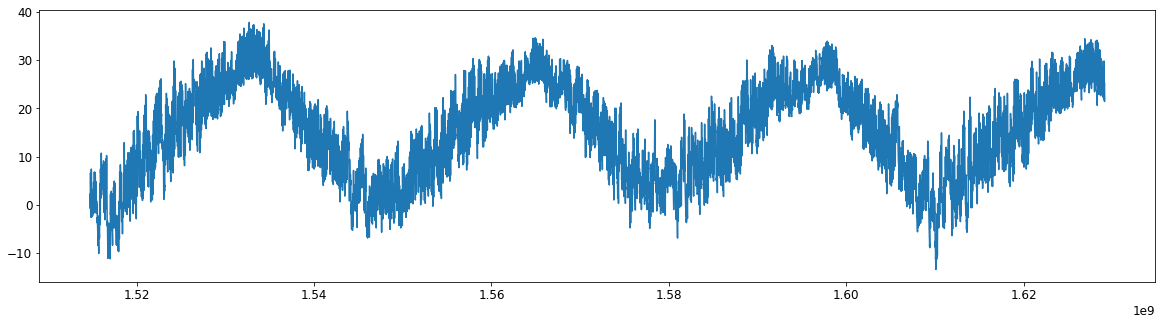

In [59]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

xn = temperature['temperature']
t = temperature['timestamp']
plt.plot(t, xn)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


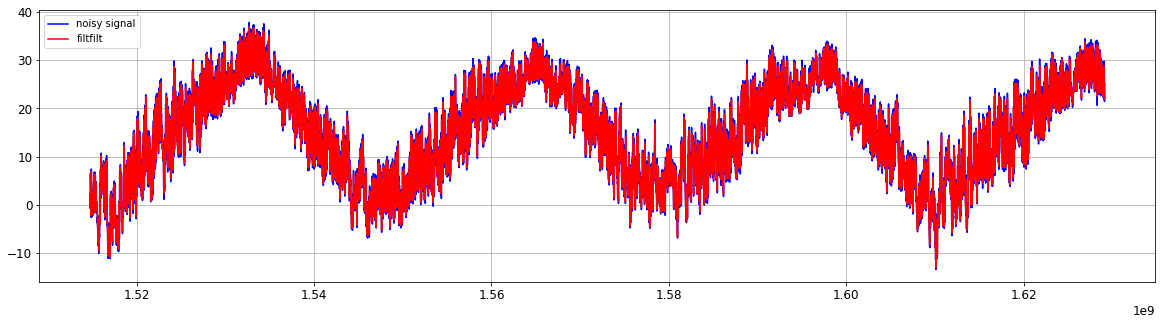

In [60]:
#figure size
plt.rcParams['figure.figsize'] = [20, 5]

#filter variable
b, a = signal.butter(1, 0.3)

y = signal.filtfilt(b, a, xn)

plt.figure
plt.subplot(1,1,1)
plt.plot(t, xn, 'b')
plt.plot(t, y, 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()


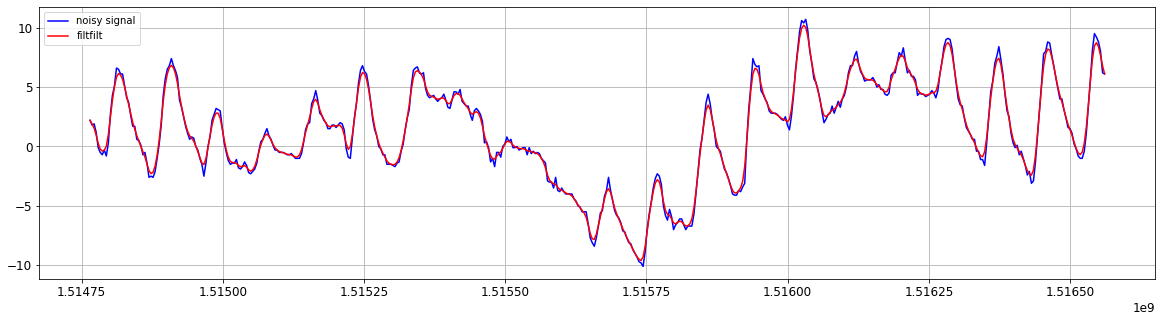

In [61]:
plt.figure
plt.subplot(1,1,1)
plt.plot(t[:500], xn[:500], 'b')
plt.plot(t[:500], y[:500], 'r') #lfilter
plt.legend(('noisy signal','filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [62]:
temperature["temperature"] = y

In [63]:
temperature.isnull().any()

datetime       False
temperature    False
timestamp      False
dtype: bool

In [64]:
temperature.shape

(31757, 3)

In [65]:
#save the processed data
#save the dataframe into drive
temperature.to_csv('./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/temperature_20210817.csv', sep=',', na_rep='Na')

# test data set for submit to GIST

In [20]:
korea_electricity_df

,timestamp,korea_electricity
0,1.483229e+09,55121.616383
1,1.483232e+09,53257.912275
2,1.483236e+09,51766.816937
3,1.483240e+09,50887.967383
4,1.483243e+09,50609.401098
...,...,...
19,1.617217e+09,64714.524599
20,1.617221e+09,64103.836197
21,1.617224e+09,63009.019930
22,1.617228e+09,61918.790078


In [66]:
#merge with df_data
external_data = temperature
if('korea_electricity' not in external_data.columns):
  external_data = pd.merge(external_data, korea_electricity_df, how='inner', on='timestamp')

In [67]:
external_data

,datetime,temperature,timestamp,korea_electricity
0,2018-01-01 00:00,2.200179,1.514765e+09,55905.294634
1,2018-01-01 01:00,1.892949,1.514768e+09,54321.118596
2,2018-01-01 02:00,1.540764,1.514772e+09,53132.206402
3,2018-01-01 03:00,0.965233,1.514776e+09,52471.454258
4,2018-01-01 04:00,0.270809,1.514779e+09,52227.791456
...,...,...,...,...
28454,2021-03-31 19:00,18.475687,1.617217e+09,64714.524599
28455,2021-03-31 20:00,17.312417,1.617221e+09,64103.836197
28456,2021-03-31 21:00,16.517213,1.617224e+09,63009.019930
28457,2021-03-31 22:00,15.851346,1.617228e+09,61918.790078


In [68]:
external_data.shape

(28459, 4)

In [41]:
from datetime import datetime
  
  
timestamp = 	1.483229e+09		
dt_obj = datetime.fromtimestamp(timestamp)
  
print("date_time:",dt_obj)
print("type of dt:",type(dt_obj))

date_time: 2017-01-01 00:03:20
type of dt: <class 'datetime.datetime'>


In [69]:
# #save the processed data
# #save the dataframe into drive
# external_data.to_csv('./drive/MyDrive/Colab Notebooks/EnerGist_2021.07/Data/externalData_20210817.csv', sep=',', na_rep='Na')

In [129]:
def search_external(input_date, input_df):
  """
  input_date : string ; input
  input_df : pandas dataframe
  --------------
  output : panda dataframe
  """
  if not ('datetime' in input_df.columns): 
    print("ERROR")

  input_df["date"] = [0] * input_df.shape[0]
  for i in range(input_df.shape[0]):
    input_df["date"][i] = input_df["datetime"][i].split()[0]
  input_df = input_df[input_df["date"] == input_date]
  return input_df
  

In [130]:
search_external("2020-09-01", external_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,datetime,temperature,timestamp,korea_electricity,date
23371,2020-09-01 00:00,25.762901,1.598918e+09,58895.347426,2020-09-01
23372,2020-09-01 01:00,25.346305,1.598922e+09,57073.440110,2020-09-01
23373,2020-09-01 02:00,24.819331,1.598926e+09,56075.939209,2020-09-01
23374,2020-09-01 03:00,24.284406,1.598929e+09,55684.235236,2020-09-01
23375,2020-09-01 04:00,23.832803,1.598933e+09,55919.024065,2020-09-01
23376,2020-09-01 05:00,23.532407,1.598936e+09,57071.103004,2020-09-01
23377,2020-09-01 06:00,23.487854,1.598940e+09,59417.992652,2020-09-01
23378,2020-09-01 07:00,23.882111,1.598944e+09,62777.459529,2020-09-01
23379,2020-09-01 08:00,24.847384,1.598947e+09,66370.057239,2020-09-01
23380,2020-09-01 09:00,26.229769,1.598951e+09,69165.502459,2020-09-01


In [113]:
temp= [0] * external_data.shape[0]
external_data["date"] = [0] * external_data.shape[0]
for i in range(external_data.shape[0]):
  temp = external_data["datetime"][i].split()[0]
  external_data["date"][i] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [120]:
external_data.drop("date", axis=1)

,datetime,temperature,timestamp,korea_electricity
0,2018-01-01 00:00,2.200179,1.514765e+09,55905.294634
1,2018-01-01 01:00,1.892949,1.514768e+09,54321.118596
2,2018-01-01 02:00,1.540764,1.514772e+09,53132.206402
3,2018-01-01 03:00,0.965233,1.514776e+09,52471.454258
4,2018-01-01 04:00,0.270809,1.514779e+09,52227.791456
...,...,...,...,...
28454,2021-03-31 19:00,18.475687,1.617217e+09,64714.524599
28455,2021-03-31 20:00,17.312417,1.617221e+09,64103.836197
28456,2021-03-31 21:00,16.517213,1.617224e+09,63009.019930
28457,2021-03-31 22:00,15.851346,1.617228e+09,61918.790078


In [118]:
external_data[external_data["date"] == "2018-01-22"]

,datetime,temperature,timestamp,korea_electricity,date
504,2018-01-22 00:00,3.908109,1.516579e+09,57822.832575,2018-01-22
505,2018-01-22 01:00,3.687390,1.516583e+09,56777.444536,2018-01-22
506,2018-01-22 02:00,3.624310,1.516586e+09,56255.984243,2018-01-22
507,2018-01-22 03:00,3.560261,1.516590e+09,56329.894833,2018-01-22
508,2018-01-22 04:00,3.475539,1.516594e+09,57219.873379,2018-01-22
509,2018-01-22 05:00,3.426640,1.516597e+09,59087.803189,2018-01-22
510,2018-01-22 06:00,3.485234,1.516601e+09,62065.199585,2018-01-22
511,2018-01-22 07:00,3.698444,1.516604e+09,66196.811898,2018-01-22
512,2018-01-22 08:00,4.084798,1.516608e+09,70635.830704,2018-01-22
513,2018-01-22 09:00,4.730350,1.516612e+09,73740.005596,2018-01-22


In [111]:
external_data[external_data["datetime"] == "2019-09-03"]

,datetime,temperature,timestamp,korea_electricity


In [75]:
temp = external_data['datetime']

In [83]:
temp

0        2018-01-01 00:00
1        2018-01-01 01:00
2        2018-01-01 02:00
3        2018-01-01 03:00
4        2018-01-01 04:00
               ...       
28454    2021-03-31 19:00
28455    2021-03-31 20:00
28456    2021-03-31 21:00
28457    2021-03-31 22:00
28458    2021-03-31 23:00
Name: datetime, Length: 28459, dtype: object

In [82]:
temp[0].split()[0]

'2018-01-01'

In [78]:
temp.split(' ')

AttributeError: ignored

# Reference
- Hands-on Machine learning, 2nd edition
- https://www.tensorflow.org/tutorials/structured_data/time_series#%EC%84%A4%EC%A0%95